In [74]:
import numpy as np
import matplotlib.pyplot as plt
from read_file import *
import os

In [75]:
def get_reference(filename):
    harvest_ref = []
    rows = []
    # reading csv file
    with open(filename, 'r') as csvfile:
        # creating a csv reader object
        csvreader = csv.reader(csvfile)

        # extracting each data row one by one
        for row in csvreader:
            rows.append(row)

    harvest_ref = [float(x) for x in rows[0]]
    return np.array(harvest_ref)

In [76]:
def read_Fd_error(find_vector, rows):
    prev_pull = 0 
    vector = []
    for i, row in enumerate(rows):
        if len(row) > 0:
            compare_str = row[0][0:len(find_vector)]
            if compare_str == find_vector:
                pull = float(row[0][len(find_vector)::])
                vector.append(pull)
                
    return vector

alpha = 10; 15 iterations 

In [77]:
find_error = 'Pulling force relative error = '
find_dif = 'Pulling difference = '
find_fd = 'Fd = '
find_compression = 'Compression Loadcell = ['
find_pressure = 'Raspberry Reading = ['
find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = ['
fail = 'PICKING FAILED'
iterations = 15

In [78]:
directory = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220717_H_M_L_Force/data'

In [79]:
force_lvl = ['H', 'L', 'M']
plant = ['S', 'TPU']

In [80]:
folder = os.listdir(directory)[0]
directory+'/'+folder
folder2 = os.listdir(directory+'/'+folder)[0]
os.listdir(directory+'/'+folder+'/'+folder2)[1][-4::]

'.txt'

In [81]:
for i,folder in enumerate(os.listdir(directory)):
    for j,folder2 in enumerate(os.listdir(directory+'/'+folder)):
        for folder3 in os.listdir(directory+'/'+folder+'/'+folder2):
            if folder3[-4::] == '.txt':
                filename = directory+'/'+folder+'/'+folder2+'/'+folder3
                rows = read_csv_file(filename)
                fail_index = find_fails(fail, find_fd, rows)
                error = read_Fd_error(find_error, rows)
                Fd = read_Fd_error(find_fd, rows)
                time_vec = read_pressure_pulling_force(find_time, fail_index, rows)
                pulling_gripper = read_pressure_pulling_force(find_pull_grip, fail_index, rows)
                raspberry_reading = read_pressure_pulling_force(find_pressure, fail_index, rows)
                pulling_force = read_pressure_pulling_force(find_pull, fail_index, rows)
                compression_loadcell = read_pressure_pulling_force(find_compression , fail_index, rows)

                fail_matrix = np.zeros((iterations,5))
                for k in fail_index:
                    iter = int(rows[k-1][0][12:14])
                    trial = int(rows[k-1][0][22::])
                    fail_matrix[iter-1, trial] = 1

                suffix = '_'+force_lvl[i]+'_'+plant[j]
                locals()['fails'+suffix] = fail_index
                locals()['fail_matrix'+suffix] = fail_matrix
                locals()['error'+suffix] = error
                locals()['time'+suffix]  = time_vec
                locals()['pulling_gripper'+suffix] = pulling_gripper
                locals()['raspberry'+suffix] = raspberry_reading 
                locals()['pulling_force'+suffix] = pulling_force
                locals()['comp'+suffix] = compression_loadcell
                locals()['Fd'+suffix] = Fd

            else:
                for file in os.listdir(directory+'/'+folder+'/'+folder2+'/'+folder3):
                    if file[-4::] == '.csv':
                        ref_p = directory+'/'+folder+'/'+folder2+'/'+folder3+'/'+file
                        ref_pressure = get_reference(ref_p)
                        ref_max = max(ref_pressure)
                        suffix = '_'+force_lvl[i]+'_'+plant[j]
                        locals()['ref_pressure'+suffix] = ref_pressure
                        locals()['ref_max'+suffix] = ref_max


Mean max 166.20758620689656
Mean max dif 184.05551724137905
Max dif 185.48



Mean max 110.60031746031747
Mean max dif 141.62492063492047
Max dif 142.07



Mean max 71.25467741935482
Mean max dif 85.06209677419353
Max dif 87.72





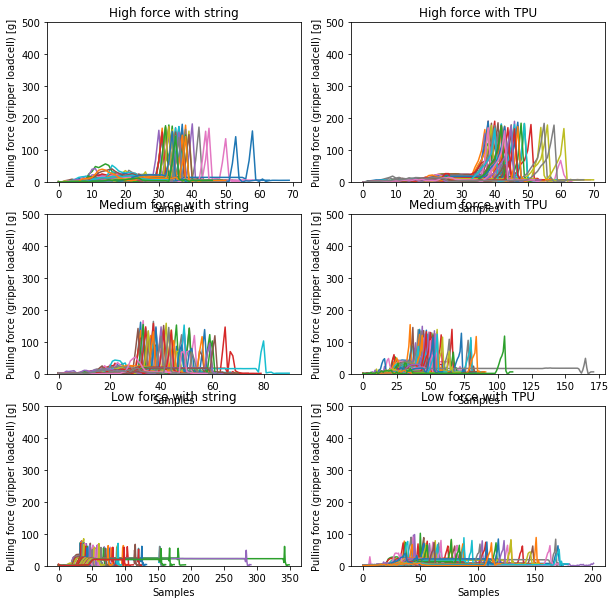

In [82]:
pulling_forces_gripper = [[pulling_gripper_H_S, pulling_gripper_H_TPU],
                          [pulling_gripper_M_S, pulling_gripper_M_TPU],
                          [pulling_gripper_L_S, pulling_gripper_L_TPU]]

titles = [['High force with string', 'High force with TPU'],
          ['Medium force with string', 'Medium force with TPU'],
          ['Low force with string', 'Low force with TPU']]

plot_pull = [[[],[]],[[],[]],[[],[]]]#,[[],[]]]

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(10,10)
for i in range(3):
    for j in range(2):
        sum = 0
        dif_0 = 0
        max_difs = 0
        for pull in pulling_forces_gripper [i][j]:
            axs[i][j].plot(range(len(pull)), pull)
            axs[i][j].set_xlabel("Samples")
            axs[i][j].set_ylabel("Pulling force (gripper loadcell) [g]")
            axs[i][j].set_ylim([0, 500])
            axs[i][j].set_title(titles[i][j])
            sum += np.max(pull)
            for k in range(1, len(pull)):
                dif = pull[k-1]-pull[k]
                if dif > dif_0:
                    dif_0 = dif
            max_difs += dif_0
        if j == 1:
            print('Mean max',sum/len(pulling_forces_gripper[i][j]))
            print('Mean max dif', max_difs/len(pulling_forces_gripper[i][j]))
            print('Max dif', dif_0)
            print('\n\n')


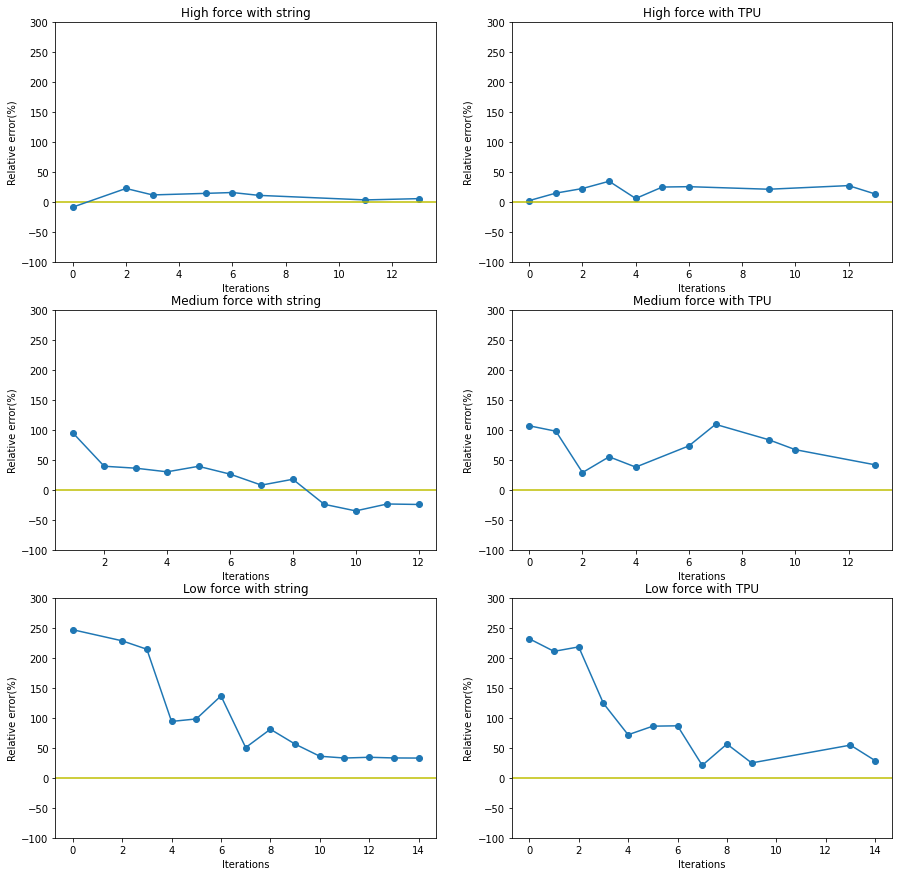

In [83]:
# Only fully successful iteration
errors = [[error_H_S, error_H_TPU],
          [error_M_S, error_M_TPU],
          [error_L_S, error_L_TPU]]#,
          #[error_VH_S, error_VH_TPU]]

fail_matrixes = [[fail_matrix_H_S, fail_matrix_H_TPU],
                 [fail_matrix_M_S, fail_matrix_M_TPU],
                 [fail_matrix_L_S, fail_matrix_L_TPU]]#,
                 #[fail_matrix_VH_S, fail_matrix_VH_TPU]]

titles = [['High force with string', 'High force with TPU'],
          ['Medium force with string', 'Medium force with TPU'],
          ['Low force with string', 'Low force with TPU']]#,
          #['Very high force with string', 'Very high force with TPU']]

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(15,15)
for i in range(3):
    for j in range(2):
        plot_dif0 = []
        x_dif = []
        for k in range(len(errors[i][j])):
            if not any(fail_matrixes[i][j][k]):
                plot_dif0.append(-errors[i][j][k]*100)
                x_dif.append(k)
        axs[i][j].axhline(y = 0, color = 'y', label = 'axhline - full height')
        axs[i][j].scatter(x_dif, plot_dif0)
        axs[i][j].plot(x_dif, plot_dif0)
        axs[i][j].set_xlabel("Iterations")
        axs[i][j].set_ylabel("Relative error(%)")
        axs[i][j].set_ylim([-100, 300])
        axs[i][j].set_title(titles[i][j])

In [84]:
Fds = [[Fd_H_S, Fd_H_TPU], [Fd_M_S, Fd_M_TPU], [Fd_L_S, Fd_L_TPU]]#, [Fd_VH_S, Fd_VH_TPU]]
forces = [[[],[]],[[],[]],[[],[]]]#,[[],[]]]
for i in range(3):
    for j in range(2):
        for k in range(0,iterations*5,5):
            forces[i][j].append(Fds[i][j][k])


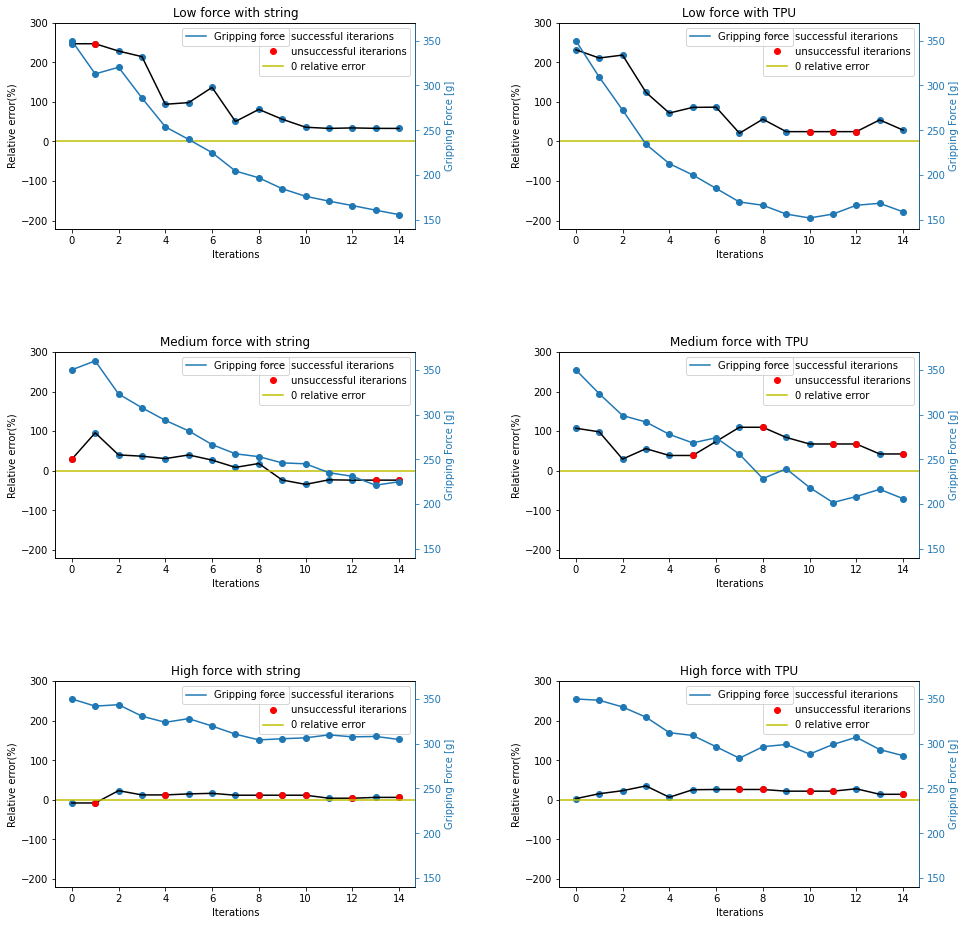

In [85]:
Fds = [[Fd_L_S, Fd_L_TPU], [Fd_M_S, Fd_M_TPU], [Fd_H_S, Fd_H_TPU]]#, [Fd_VH_S, Fd_VH_TPU]]
forces = [[[],[]],[[],[]],[[],[]]]#,[[],[]]]
for i in range(3):
    for j in range(2):
        for k in range(0,iterations*5,5):
            forces[i][j].append(Fds[i][j][k])

titles = [['Low force with string', 'Low force with TPU'],
          ['Medium force with string', 'Medium force with TPU'],
          ['High force with string', 'High force with TPU']]

errors = [[error_L_S, error_L_TPU],
          [error_M_S, error_M_TPU],
          [error_H_S, error_H_TPU]]#,
          #[error_VH_S, error_VH_TPU]]

fail_matrixes = [[fail_matrix_L_S, fail_matrix_L_TPU],
                 [fail_matrix_M_S, fail_matrix_M_TPU],
                 [fail_matrix_H_S, fail_matrix_H_TPU]]

fig, axs = plt.subplots(3, 2)
plt.rcParams["figure.autolayout"] = True
fig.set_size_inches(15,15)
for i in range(3):
    for j in range(2):
        plot_dif0 = []
        x_dif = []
        star = []
        star_plot = []
        for k in range(len(errors[i][j])):
            if not any(fail_matrixes[i][j][k]):
                plot_dif0.append(-errors[i][j][k]*100)
                x_dif.append(k)
                previous = -errors[i][j][k]*100
            else:
                # plot_dif0.append(-errors[i][j][k]*100)
                # x_dif.append(k)
                # star.append(k)
                # star_plot.append(-errors[i][j][k]*100)
                plot_dif0.append(previous)
                x_dif.append(k)
                star.append(k)
                star_plot.append(previous)
        # plt.axhline(y = 0, color = 'y')
        axs[i][j].scatter(x_dif, plot_dif0)
        axs[i][j].plot(x_dif, plot_dif0,'k', label='successful iterarions')
        axs[i][j].plot(star, star_plot,'ro', label='unsuccessful iterarions')
        axs[i][j].axhline(y = 0, color = 'y', label = '0 relative error')
        axs[i][j].legend(loc="upper right")
        axs[i][j].set_xlabel("Iterations")
        axs[i][j].set_ylabel("Relative error(%)")
        axs[i][j].set_title(titles[i][j])
        axs[i][j].set_ylim([-220, 300])
        ax1 = axs[i][j].twinx()
        ax1.scatter(range(iterations),forces[i][j])
        ax1.plot(range(iterations), forces[i][j], label = 'Gripping force')
        ax1.yaxis.label.set_color('C0') 
        ax1.spines['right'].set_color('C0') 
        ax1.tick_params(axis='y', colors='C0')
        ax1.legend(loc="upper center")
        ax1.set_ylabel("Gripping Force [g]")
        ax1.set_ylim([140,370])

plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.6)


C:\Users\Catarina.LAPTOP-GAR6C5UR\AppData\Local\Temp\ipykernel_10680\3057513725.py:66: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  axs[i][j].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)


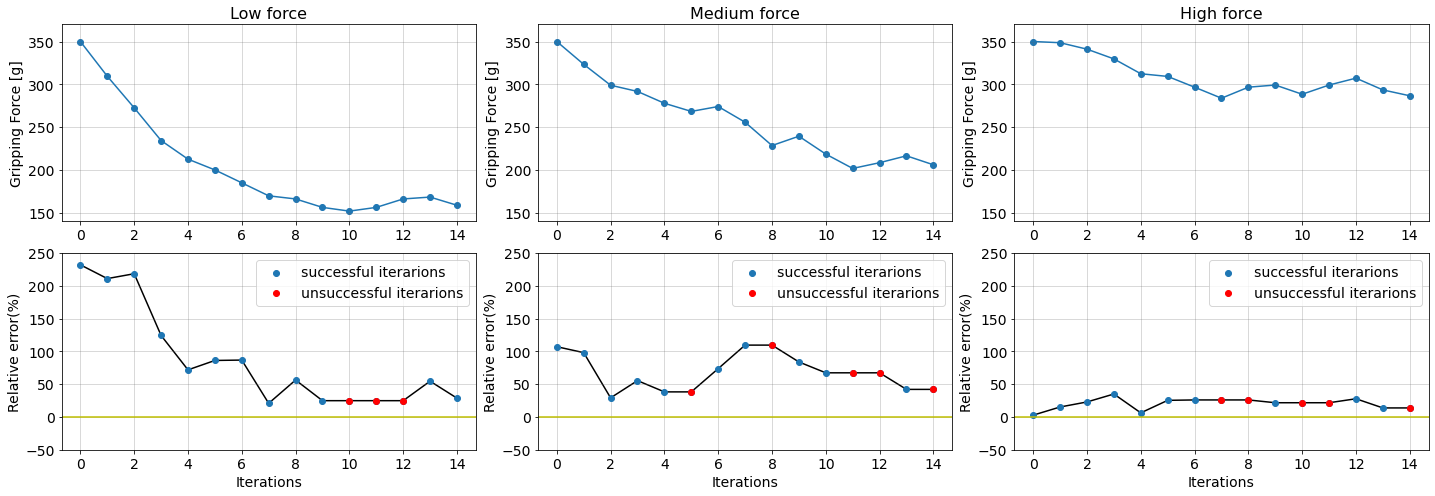

In [112]:
Fds = [[Fd_L_TPU], [Fd_M_TPU], [Fd_H_TPU]]#, [Fd_VH_S, Fd_VH_TPU]]
forces = [[[],[]],[[],[]],[[],[]]]#,[[],[]]]
for i in range(3):
    for j in range(1):
        for k in range(0,iterations*5,5):
            forces[i][j].append(Fds[i][j][k])

titles = [['Low force'],
          ['Medium force'],
          ['High force']]

errors = [[error_L_TPU],
          [error_M_TPU],
          [error_H_TPU]]#,
          #[error_VH_S, error_VH_TPU]]

fail_matrixes = [[fail_matrix_L_TPU],
                 [fail_matrix_M_TPU],
                 [fail_matrix_H_TPU]]

fontsize_leg = 14
font_title = 16


fig, axs = plt.subplots(2, 3)
# plt.rcParams["figure.autolayout"] = True
fig.set_size_inches(20,7)
for i in range(2):
    for j in range(3):
        if i == 1:
            plot_dif0 = []
            x_dif = []
            star = []
            star_plot = []
            for k in range(len(errors[j][0])):
                if not any(fail_matrixes[j][0][k]):
                    plot_dif0.append(-errors[j][0][k]*100)
                    x_dif.append(k)
                    previous = -errors[j][0][k]*100
                else:
                    # plot_dif0.append(-errors[i][j][k]*100)
                    # x_dif.append(k)
                    # star.append(k)
                    # star_plot.append(-errors[i][j][k]*100)
                    plot_dif0.append(previous)
                    x_dif.append(k)
                    star.append(k)
                    star_plot.append(previous)
            # plt.axhline(y = 0, color = 'y')
            axs[i][j].plot(x_dif, plot_dif0,'k', zorder=1)
            axs[i][j].scatter(x_dif, plot_dif0,label='successful iterarions', zorder=2)
            axs[i][j].plot(star, star_plot,'ro', label='unsuccessful iterarions', zorder=3)
            axs[i][j].axhline(y = 0, color = 'y')#, label = '0 relative error')
            axs[i][j].legend(loc="upper right", fontsize=fontsize_leg)
            axs[i][j].set_xlabel("Iterations",fontsize=fontsize_leg)
            axs[i][j].set_ylabel("Relative error(%)", fontsize=fontsize_leg)
            axs[i][j].set_ylim([-50, 250])
        if i == 0:
            axs[i][j].scatter(range(iterations),forces[j][i])
            axs[i][j].plot(range(iterations), forces[j][i], label = 'Gripping force')
            # axs[i][j].legend(loc="upper center")
            axs[i][j].set_ylabel("Gripping Force [g]", fontsize=fontsize_leg)
            axs[i][j].set_ylim([140,370])
            axs[i][j].set_title(titles[j][0],fontsize=font_title)
        axs[i][j].tick_params(axis='both', labelsize=fontsize_leg)
        axs[i][j].grid(b=True, color='#666666', linestyle='-', alpha = 0.3)

plt.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=1, 
                            hspace=1)


IndexError: list index out of range

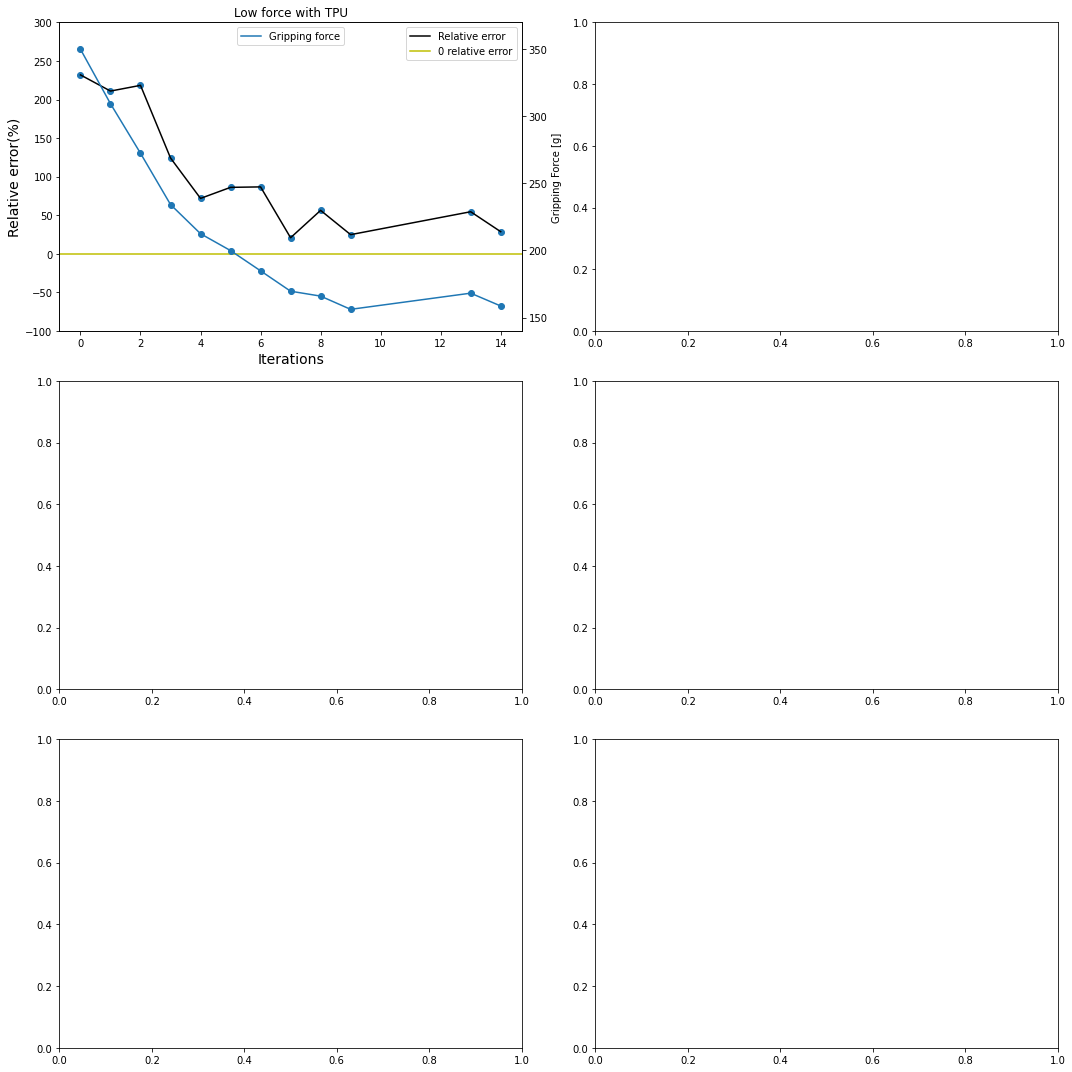

In [104]:
fig, axs = plt.subplots(3, 2)
plt.rcParams["figure.autolayout"] = True
fig.set_size_inches(15,15)
for i in range(3):
    for j in range(2):
        plot_dif0 = []
        x_dif = []
        star = []
        star_plot = []
        plot_force = []
        for k in range(len(errors[i][j])):
            if not any(fail_matrixes[i][j][k]):
                plot_dif0.append(-errors[i][j][k]*100)
                plot_force.append(forces[i][j][k])
                x_dif.append(k)
        # plt.axhline(y = 0, color = 'y')
        axs[i][j].scatter(x_dif, plot_dif0)
        axs[i][j].plot(x_dif, plot_dif0,'k', label='Relative error')
        axs[i][j].axhline(y = 0, color = 'y', label = '0 relative error')
        axs[i][j].legend(loc="upper right")
        axs[i][j].set_xlabel("Iterations")
        axs[i][j].set_ylabel("Relative error(%)")
        axs[i][j].set_title(titles[i][j])
        axs[i][j].set_ylim([-100, 300])
        ax1 = axs[i][j].twinx()
        ax1.scatter(x_dif,plot_force)
        ax1.plot(x_dif, plot_force, label = 'Gripping force')
        ax1.legend(loc="upper center")
        ax1.set_ylabel("Gripping Force [g]")
        ax1.set_ylim([140,370])
    if j == 1:
        print('Force ', plot_force[-1], ' iter', x_dif[-1]+1)

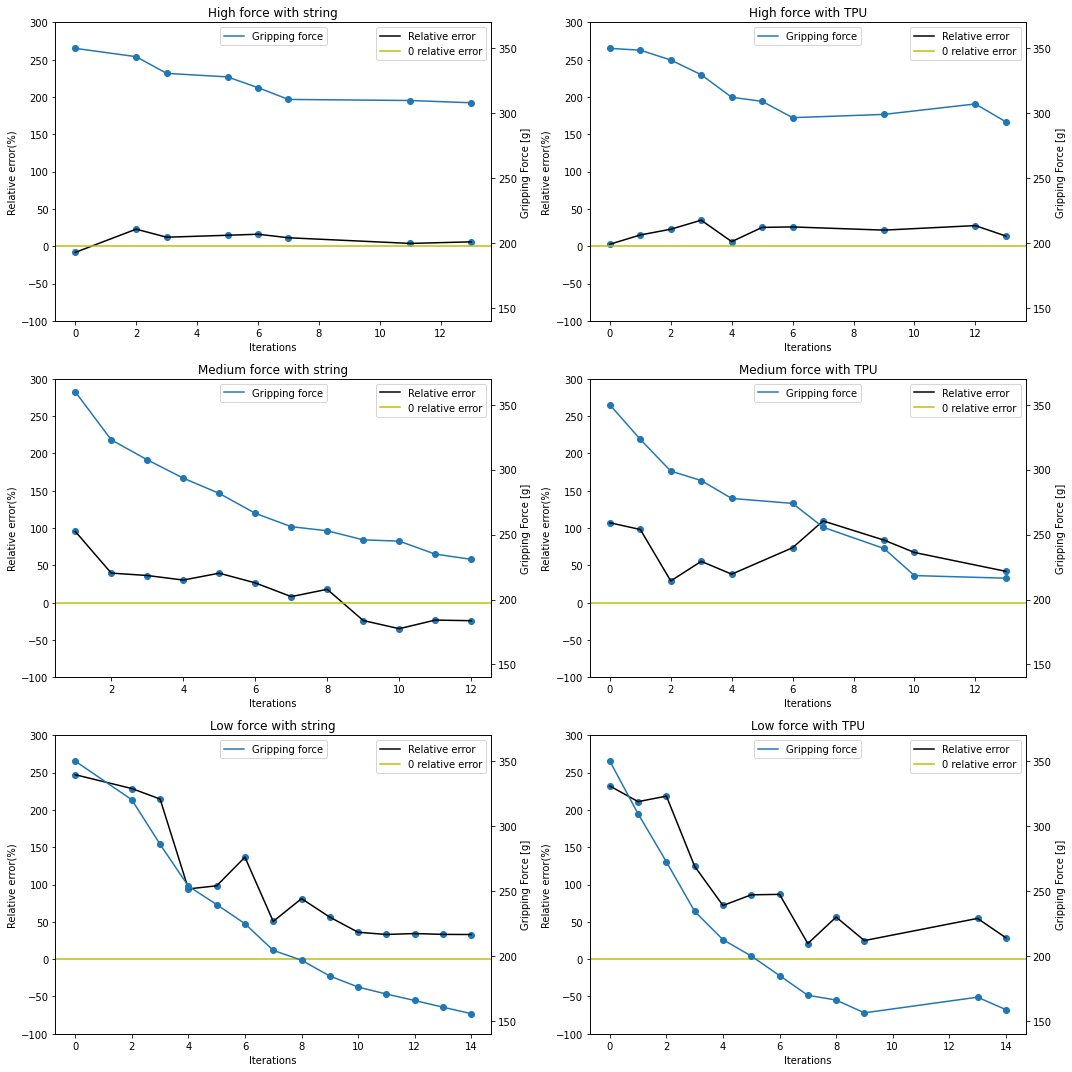

In [ ]:
fig, axs = plt.subplots(3, 2)
plt.rcParams["figure.autolayout"] = True
fig.set_size_inches(15,15)
for i in range(3):
    for j in range(2):
        plot_dif0 = []
        x_dif = []
        star = []
        star_plot = []
        plot_force = []
        for k in range(len(errors[i][j])):
            if not any(fail_matrixes[i][j][k]):
                plot_dif0.append(-errors[i][j][k]*100)
                plot_force.append(forces[i][j][k])
                x_dif.append(k)
        # plt.axhline(y = 0, color = 'y')
        axs[i][j].scatter(x_dif, plot_dif0)
        axs[i][j].plot(x_dif, plot_dif0,'k', label='Relative error')
        axs[i][j].axhline(y = 0, color = 'y', label = '0 relative error')
        axs[i][j].legend(loc="upper right")
        axs[i][j].set_xlabel("Iterations")
        axs[i][j].set_ylabel("Relative error(%)")
        axs[i][j].set_title(titles[i][j])
        axs[i][j].set_ylim([-100, 300])
        ax1 = axs[i][j].twinx()
        ax1.scatter(x_dif,plot_force)
        ax1.plot(x_dif, plot_force, label = 'Gripping force')
        ax1.legend(loc="upper center")
        ax1.set_ylabel("Gripping Force [g]")
        ax1.set_ylim([140,370])

### Pulling forces for lowest F_pull

In [15]:
# High , Medium, Low
pull_setpoints = [[
[0.59, 0.3, 3.77, 5.14, 6.72, 6.08, 5.33, 2.91, 1.56, 1.77, 1.92, 2.25, 3.33, 2.57, 4.95, 5.46, 5.02, 5.17, 7.01, 6.95, 7.04, 8.35, 9.36, 6.94, 6.32, 6.47, 4.49, 1.53, 2.59, 3.78, 4.31, 4.27, 4.51, 4.55, 4.95, 6.44, 13.95, 22.14, 32.86, 47.52, 57.41, 73.37, 111.07, 174.07, 5.33, 7.63, 1.12, 2.49, 6.12, 7.04, 7.21, 6.96, 7.03, 7.23, 7.31],
[0.15, 0.7, 1.52, 2.05, 2.42, 2.53, 2.7, 2.99, 3.33, 3.54, 3.64, 3.86, 4.02, 4.18, 4.32, 4.45, 4.66, 4.84, 4.9, 4.98, 5.12, 5.11, 5.28, 5.15, 5.55, 6.38, 7.63, 7.41, 7.27, 6.76, 6.37, 6.41, 6.28, 6.29, 6.29, 6.23, 6.23, 6.23, 6.16, 6.11, 6.12, 6.14, 6.04, 4.35, 0.11, 5.91, 63.5, 173.49, 19.85, 0.71, 4.31, 6.57, 7.74, 7.02, 7.31, 7.26, 7.4, 7.51],
[0.19, 0.57, 1.52, 1.97, 2.34, 2.48, 2.72, 2.91, 3.49, 6.27, 7.02, 4.73, 1.52, 1.51, 4.36, 2.12, 4.44, 4.89, 3.67, 6.11, 6.89, 10.46, 10.31, 7.47, 9.27, 6.52, 7.79, 0.18, 0.92, 0.72, 1.17, 1.2, 1.08, 1.18, 2.23, 8.54, 18.4, 26.55, 42.49, 59.86, 71.58, 109.71, 176.28, 11.56, 4.33, 4.88, 6.62, 7.07, 7.33, 6.9, 7.08, 7.09, 7.13],
[0.01, 0.55, 1.62, 1.84, 2.23, 2.43, 2.72, 3.0, 3.22, 3.45, 3.66, 3.8, 3.92, 4.02, 4.3, 3.47, 2.16, 7.06, 11.53, 15.52, 10.58, 9.7, 7.9, 8.47, 10.16, 8.16, 6.59, 5.4, 4.95, 4.3, 3.82, 4.91, 5.64, 6.08, 6.35, 6.39, 6.42, 6.36, 6.36, 6.22, 6.15, 6.26, 6.53, 8.45, 47.85, 72.35, 166.43, 20.98, 2.59, 5.39, 6.77, 7.21, 7.26, 7.14, 7.14, 7.02],
[0.12, 0.83, 1.73, 2.02, 2.37, 2.53, 2.68, 3.02, 3.33, 3.46, 3.0, 4.01, 6.28, 6.07, 2.87, 7.32, 7.83, 3.06, 3.49, 7.67, 9.41, 9.0, 9.52, 9.8, 9.18, 2.95, 1.16, 2.93, 3.42, 4.06, 4.46, 4.45, 4.36, 4.28, 4.22, 4.21, 4.44, 6.86, 12.5, 20.65, 30.29, 46.25, 60.52, 76.34, 116.09, 175.46, 4.85, 8.05, 0.81, 6.39, 7.05, 6.75, 7.04, 6.69, 6.62]
],[
[0.58, 0.32, 0.22, 0.75, 1.02, 2.02, 0.86, 6.6, 2.26, 11.84, 0.04, 3.69, 5.31, 9.82, 3.85, 3.59, 0.33, 10.86, 8.43, 7.25, 6.65, 8.12, 8.13, 7.96, 10.24, 10.99, 11.64, 9.74, 12.33, 13.31, 10.77, 4.0, 11.97, 11.25, 9.56, 4.21, 8.16, 2.12, 5.14, 5.29, 5.19, 5.27, 5.27, 5.16, 5.23, 5.31, 6.66, 17.01, 26.63, 39.27, 53.45, 61.49, 77.99, 134.95, 12.35, 2.47, 0.33, 5.59, 5.84, 5.92, 6.06],
[0.84, 0.69, 0.02, 0.57, 1.02, 1.2, 1.36, 1.44, 1.62, 2.2, 2.14, 2.26, 3.15, 2.62, 2.76, 2.91, 2.89, 3.05, 3.05, 3.15, 3.33, 2.35, 2.75, 6.0, 1.57, 2.73, 2.51, 7.49, 8.78, 11.12, 13.94, 10.63, 6.15, 8.92, 11.17, 5.11, 0.07, 0.59, 0.82, 0.36, 0.27, 0.23, 0.4, 0.34, 0.25, 3.8, 12.32, 22.5, 34.51, 48.71, 59.5, 72.66, 120.75, 9.16, 2.35, 2.05, 1.98, 2.34, 2.07, 2.86, 2.73, 2.81, 2.8, 3.26, 3.03, 6.77, 2.95, 6.49, 3.96, 1.9, 3.09, 3.13, 3.13, 3.27, 3.25, 4.02, 5.01, 3.32, 4.0, 5.91, 6.39, 6.94, 7.06, 6.93, 7.13, 7.12],
[0.94, 0.73, 0.02, 0.51, 0.85, 1.09, 1.34, 1.5, 1.76, 2.02, 2.21, 2.31, 2.44, 2.63, 2.75, 2.89, 2.97, 3.07, 3.17, 3.26, 3.35, 3.41, 3.52, 3.35, 3.42, 3.49, 3.73, 2.52, 8.56, 4.06, 7.07, 14.36, 4.84, 7.47, 3.78, 14.39, 16.29, 17.93, 18.98, 19.61, 19.97, 20.17, 20.25, 20.27, 20.85, 20.78, 18.75, 9.91, 0.26, 12.05, 103.67, 16.87, 4.4, 2.87, 6.49, 6.26, 6.18],
[1.22, 0.97, 0.21, 0.34, 0.82, 1.1, 1.27, 1.41, 1.68, 1.91, 2.14, 2.33, 2.43, 2.58, 2.77, 2.83, 2.93, 2.96, 3.13, 3.27, 3.34, 3.37, 3.43, 3.5, 3.71, 3.84, 3.85, 4.27, 3.31, 3.41, 7.96, 7.75, 2.41, 6.2, 8.49, 9.84, 13.0, 14.69, 15.92, 16.74, 17.08, 16.97, 17.57, 17.5, 17.42, 17.43, 17.35, 17.33, 17.38, 17.32, 17.21, 17.19, 17.25, 17.21, 17.18, 17.15, 17.16, 17.12, 17.07, 16.93, 17.09, 17.12, 16.98, 17.0, 17.09, 17.09, 17.05, 16.95, 17.27, 17.35, 17.28, 17.32, 17.28, 17.33, 17.3, 17.26, 17.32, 17.21, 17.22, 17.25, 17.21, 17.23, 17.27, 17.21, 17.26, 17.18, 17.17, 17.12, 17.19, 17.2, 17.15, 17.24, 17.16, 17.17, 17.14, 17.16, 17.14, 17.11, 17.1, 17.13, 17.14, 17.13, 17.11, 17.09, 17.11, 17.14, 17.09, 17.14, 17.17, 17.13, 17.07, 17.08, 17.09, 17.05, 17.1, 17.1, 17.09, 17.16, 17.12, 17.07, 17.09, 17.07, 17.07, 17.08, 17.06, 17.09, 17.04, 17.01, 17.03, 17.03, 17.04, 16.97, 17.07, 16.92, 17.64, 18.09, 18.33, 18.06, 18.31, 18.65, 18.03, 17.96, 18.19, 17.64, 18.04, 17.91, 17.9, 17.9, 17.95, 17.96, 17.9, 17.96, 17.88, 17.91, 18.04, 17.77, 18.08, 18.03, 17.91, 17.93, 16.22, 8.51, 2.51, 12.01, 27.87, 48.87, 18.95, 0.03, 3.51, 6.37, 6.62, 6.53],
[1.17, 0.89, 0.28, 0.37, 0.71, 1.0, 1.19, 1.37, 1.61, 1.81, 2.05, 2.28, 0.21, 1.79, 2.34, 0.31, 4.57, 12.58, 6.06, 6.83, 15.41, 11.12, 15.35, 12.08, 14.37, 9.39, 6.14, 10.03, 10.01, 11.58, 13.77, 13.26, 12.77, 13.24, 10.26, 17.3, 2.74, 3.65, 3.43, 3.76, 4.01, 4.22, 4.23, 4.24, 4.15, 4.18, 4.1, 4.06, 4.09, 4.03, 4.06, 4.07, 4.1, 4.04, 4.06, 4.0, 3.93, 3.97, 4.01, 3.92, 3.8, 4.39, 1.47, 48.09, 70.74, 12.19, 21.75, 2.2, 4.59, 5.96, 5.9, 5.83, 5.66]
],[
[0.48, 1.08, 0.81, 2.16, 2.08, 1.14, 1.22, 1.41, 1.68, 2.94, 3.1, 3.24, 2.24, 2.03, 3.2, 2.06, 3.32, 2.91, 3.15, 2.15, 2.91, 3.69, 3.15, 3.23, 4.35, 3.36, 4.76, 3.43, 4.43, 2.11, 2.11, 2.31, 1.9, 4.1, 1.42, 3.1, 5.01, 6.01, 7.75, 6.42, 8.55, 7.71, 9.21, 8.99, 8.53, 9.36, 11.31, 10.95, 9.47, 8.0, 8.77, 10.12, 10.47, 8.94, 3.62, 5.42, 4.32, 3.83, 3.29, 3.03, 2.94, 2.83, 2.67, 2.64, 2.62, 2.63, 2.61, 2.58, 2.57, 2.52, 2.54, 2.51, 2.42, 2.42, 2.4, 2.45, 2.4, 2.4, 2.37, 2.35, 2.28, 2.33, 2.31, 2.31, 2.27, 2.26, 2.31, 2.24, 2.28, 2.22, 2.22, 2.26, 2.19, 2.22, 2.13, 2.22, 1.02, 5.01, 14.72, 28.24, 37.53, 40.84, 67.86, 15.07, 0.69, 4.07, 6.3, 6.08, 6.09, 6.1],
[0.49, 0.23, 0.48, 0.79, 1.0, 1.3, 1.58, 1.71, 1.69, 2.05, 2.06, 2.14, 2.26, 2.36, 2.54, 2.61, 2.82, 2.85, 3.0, 3.04, 3.16, 3.23, 3.32, 3.44, 3.45, 3.57, 3.51, 3.67, 3.73, 3.75, 3.88, 4.3, 6.04, 6.45, 7.27, 8.0, 9.68, 9.43, 8.34, 8.84, 9.14, 8.6, 8.54, 8.75, 8.68, 8.29, 8.49, 8.82, 8.46, 9.06, 6.03, 6.26, 6.29, 5.65, 5.92, 5.55, 5.3, 5.21, 5.06, 4.97, 4.93, 4.92, 4.88, 4.87, 4.81, 4.81, 4.71, 4.77, 4.8, 4.5, 4.6, 4.59, 4.65, 4.56, 4.63, 4.55, 4.53, 4.56, 4.54, 4.53, 4.53, 4.51, 4.51, 4.45, 4.49, 4.43, 4.4, 4.47, 4.42, 4.37, 4.4, 4.36, 4.35, 4.4, 4.39, 4.35, 4.36, 4.4, 4.26, 4.38, 4.29, 4.32, 4.34, 4.31, 4.34, 4.36, 4.31, 4.31, 4.27, 4.34, 4.24, 4.29, 4.27, 4.28, 4.27, 4.25, 4.23, 4.23, 4.26, 4.21, 4.24, 4.2, 4.24, 4.2, 4.17, 4.21, 4.19, 4.24, 4.15, 4.18, 4.2, 4.18, 4.16, 4.2, 3.6, 4.4, 4.23, 4.17, 4.26, 4.29, 2.15, 3.9, 12.88, 24.79, 38.53, 42.17, 43.13, 15.05, 1.1, 5.9, 6.93, 6.23, 6.44, 6.57],
[0.64, 0.63, 0.21, 0.59, 0.9, 1.21, 1.4, 1.68, 1.7, 1.82, 1.92, 2.06, 2.11, 2.28, 2.49, 2.62, 2.68, 2.74, 2.91, 3.04, 3.12, 2.94, 3.14, 4.93, 4.33, 2.36, 2.55, 3.01, 4.61, 3.87, 3.93, 7.27, 3.93, 3.04, 3.51, 5.38, 7.86, 8.9, 5.33, 8.57, 6.32, 6.48, 6.66, 5.9, 6.52, 7.1, 7.45, 8.14, 8.39, 8.99, 8.25, 5.36, 5.74, 5.7, 5.28, 4.81, 4.68, 4.35, 4.28, 4.21, 4.13, 4.14, 4.13, 3.96, 3.96, 3.96, 3.95, 3.87, 3.92, 3.89, 3.91, 3.89, 3.75, 3.79, 3.89, 3.82, 3.79, 3.77, 3.74, 3.78, 3.73, 3.78, 3.8, 3.71, 3.73, 3.72, 3.78, 3.7, 3.65, 3.61, 3.71, 3.72, 3.68, 3.61, 3.6, 3.73, 3.57, 3.66, 3.64, 3.55, 3.62, 3.55, 3.6, 3.57, 3.61, 3.57, 3.55, 3.54, 3.57, 3.55, 3.6, 3.53, 3.54, 3.61, 3.49, 3.56, 3.52, 3.57, 3.58, 3.59, 3.52, 3.55, 3.55, 3.55, 3.52, 3.6, 3.54, 3.52, 3.54, 3.52, 3.59, 3.52, 3.49, 3.53, 3.48, 3.45, 3.48, 3.49, 3.52, 3.51, 3.48, 3.5, 3.46, 3.54, 3.51, 3.42, 3.47, 3.4, 3.51, 3.48, 3.43, 3.49, 3.51, 3.53, 3.51, 3.4, 3.54, 3.49, 3.52, 3.3, 3.39, 3.52, 3.46, 3.36, 3.34, 2.26, 2.71, 9.22, 20.11, 32.14, 42.25, 51.58, 1.65, 14.28, 0.87, 5.06, 6.06, 5.52, 5.7, 5.88],
[0.52, 0.46, 0.21, 0.71, 0.76, 1.09, 1.39, 1.44, 1.68, 1.79, 1.85, 1.9, 2.09, 2.14, 2.3, 2.47, 2.56, 2.64, 2.78, 2.82, 2.94, 3.08, 4.58, 7.79, 8.05, 9.28, 11.25, 11.34, 15.84, 13.55, 15.31, 19.69, 21.5, 26.52, 26.58, 29.19, 36.05, 39.0, 20.71, 13.9, 10.82, 10.75, 9.42, 8.39, 5.69, 6.04, 6.3, 7.76, 7.87, 4.75, 1.13, 3.1, 3.48, 3.0, 2.23, 1.05, 0.14, 0.37, 0.92, 1.21, 1.47, 1.43, 1.42, 1.41, 1.47, 1.46, 1.44, 1.53, 1.5, 1.53, 1.54, 1.58, 1.5, 1.55, 1.62, 1.56, 1.59, 1.62, 1.56, 1.66, 1.66, 1.62, 1.67, 1.63, 1.66, 1.65, 1.67, 1.73, 1.8, 1.68, 1.74, 1.72, 1.75, 1.74, 1.75, 1.72, 1.76, 1.65, 1.82, 2.3, 2.21, 2.28, 2.24, 2.52, 2.54, 2.12, 3.67, 40.18, 74.49, 1.91, 15.19, 7.04, 6.32, 5.73, 6.16, 5.95],
[0.56, 0.44, 0.26, 0.71, 0.92, 1.3, 1.45, 1.58, 1.82, 1.81, 1.71, 2.08, 2.18, 2.13, 2.88, 2.81, 3.9, 2.49, 4.49, 3.83, 1.39, 2.71, 4.33, 2.09, 4.93, 1.83, 2.54, 4.65, 5.27, 2.2, 3.89, 5.32, 6.24, 4.64, 5.27, 5.53, 6.09, 7.3, 7.57, 5.73, 7.6, 5.59, 5.2, 4.57, 5.96, 6.37, 5.82, 6.53, 7.17, 8.1, 7.72, 3.58, 3.25, 3.02, 2.08, 1.61, 1.35, 1.13, 1.04, 0.99, 0.86, 0.86, 0.89, 0.76, 0.78, 0.76, 0.76, 0.71, 0.72, 0.6, 0.68, 0.6, 0.57, 0.62, 0.63, 0.6, 0.56, 0.57, 0.58, 0.49, 0.52, 0.48, 0.43, 0.51, 0.44, 0.43, 0.41, 0.48, 0.42, 0.5, 0.42, 0.36, 0.32, 0.4, 0.42, 0.32, 0.43, 0.35, 0.41, 0.37, 0.35, 0.38, 0.36, 0.39, 0.34, 0.32, 1.26, 7.98, 16.48, 29.71, 38.99, 45.97, 71.86, 11.53, 16.31, 1.93, 3.53, 5.89, 6.27, 6.42, 6.52]
]]

In [16]:
# High
offstem_idx0 = []
for pull in pull_setpoints[0]:
    dif_0 = 0
    for idx in range(len(pull)):
        dif = pull[idx-1]-pull[idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx0.append(offstem)

max_val = max(offstem_idx0)
new_pull_high = []
for i, pull in enumerate(pull_setpoints[0]):
    if i != offstem_idx0.index(max_val):
        extra = np.array([0]*(max_val-offstem_idx0[i]))
        new_pull_high.append(np.append(extra, pull))
    else:
        new_pull_high.append(np.array(pull))

# Medium
offstem_idx1 = []
for pull in pull_setpoints[1]:
    dif_0 = 0
    for idx in range(len(pull)):
        dif = pull[idx-1]-pull[idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx1.append(offstem)

max_val = max(offstem_idx1)
new_pull_medium = []
for i, pull in enumerate(pull_setpoints[1]):
    if i != offstem_idx1.index(max_val):
        extra = np.array([0]*(max_val-offstem_idx1[i]))
        new_pull_medium.append(np.append(extra, pull))
    else:
        new_pull_medium.append(np.array(pull))

# Low
offstem_idx2 = []
for pull in pull_setpoints[2]:
    dif_0 = 0
    for idx in range(len(pull)):
        dif = pull[idx-1]-pull[idx]
        if dif >= dif_0:
            dif_0 = dif
            offstem = idx
    offstem_idx2.append(offstem)

max_val = max(offstem_idx2)
new_pull_low = []
for i, pull in enumerate(pull_setpoints[2]):
    if i != offstem_idx2.index(max_val):
        extra = np.array([0]*(max_val-offstem_idx2[i]))
        new_pull_low.append(np.append(extra, pull))
    else:
        new_pull_low.append(np.array(pull))

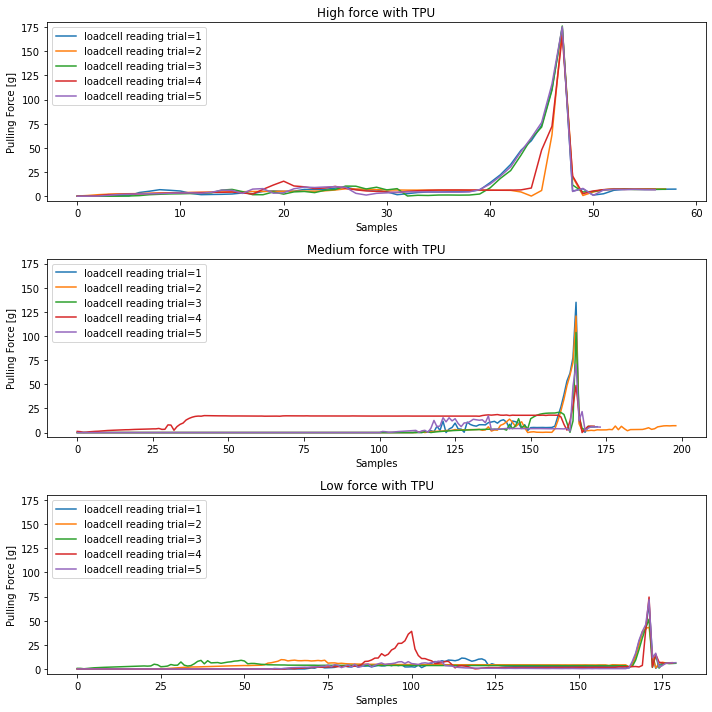

In [17]:
titles2 = [['High force with TPU'],
          ['Medium force with TPU'],
          ['Low force with TPU']]

new_pull = [new_pull_high, new_pull_medium, new_pull_low]

fig, axs = plt.subplots(3)
fig.set_size_inches(10,10)

for i, lvl in enumerate(new_pull):
    for j,pull in enumerate(lvl):
        axs[i].plot(range(len(pull)), pull, label='loadcell reading trial='+str(j+1))
    axs[i].set_xlabel("Samples")
    axs[i].set_ylabel("Pulling Force [g]")
    axs[i].set_title(titles2[i][0])
    axs[i].set_ylim([-5, 180])
    axs[i].legend(loc="upper left")

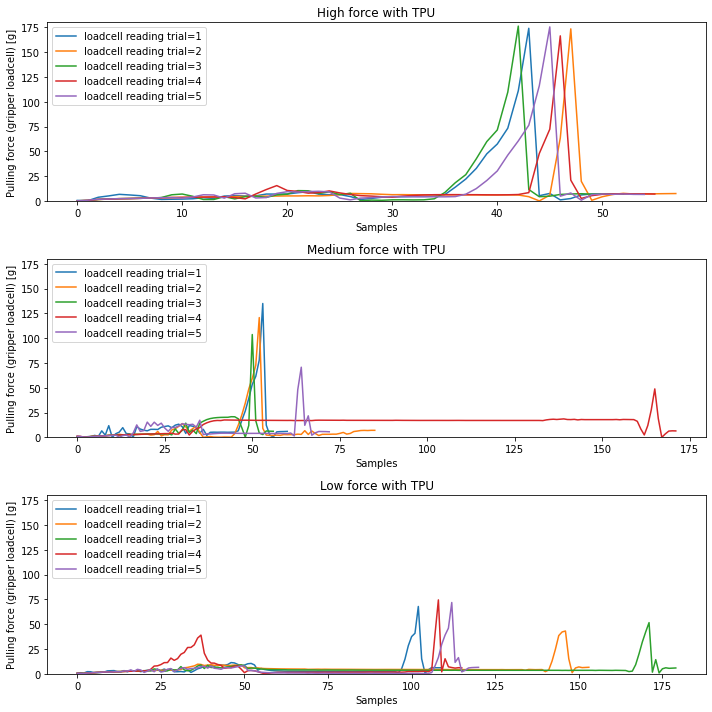

In [18]:
titles2 = [['High force with TPU'],
          ['Medium force with TPU'],
          ['Low force with TPU']]

fig, axs = plt.subplots(3)
fig.set_size_inches(10,10)
for i in range(3):
    sum = 0
    dif_0 = 0
    max_difs = 0
    for j, pull in enumerate(pull_setpoints[i]):
        axs[i].plot(range(len(pull)), pull, label='loadcell reading trial='+str(j+1))
        axs[i].set_xlabel("Samples")
        axs[i].set_ylabel("Pulling force (gripper loadcell) [g]")
        axs[i].set_ylim([0, 180])
        axs[i].set_title(titles2[i][0])
        axs[i].legend(loc="upper left")
        sum += np.max(pull)
        for k in range(1, len(pull)):
            dif = pull[k-1]-pull[k]
            if dif > dif_0:
                dif_0 = dif
        max_difs += dif_0
    # print('Mean max',sum/len(pull_setpoints[i]))
    # print('Mean max dif', max_difs/len(pull_setpoints[i]))
    # print('Max dif', dif_0)
    # print('\n\n')


### Compression Froce for force setpoints

In [19]:
# High, Medium, Low
comp_setpoint = [[
[0.01, 0.07, 0.07, 0.06, 0.07, 0.13, 0.18, 0.26, 0.31, 0.35, 0.39, 0.43, 0.45, 0.51, 0.49, 0.55, 0.62, 0.54, 0.62, 0.65, 0.63, 0.65, 0.67, 0.72, 1.42, 19.27, 47.29, 104.93, 175.83, 217.0, 239.09, 257.51, 270.22, 268.64, 288.01, 284.04, 282.97, 280.53, 278.06, 276.45, 276.59, 262.28, 255.52, 236.43, 128.82, 132.41, 158.41, 113.42, 9.41, 1.2, 1.77, 3.3, 4.33, 5.46, 6.0],
[1.11, 0.77, 1.16, 0.97, 0.86, 0.86, 0.74, 0.64, 0.55, 0.45, 0.43, 0.42, 0.28, 0.23, 0.08, 0.1, 0.03, 0.19, 0.21, 0.19, 0.38, 0.39, 0.46, 0.52, 4.57, 17.3, 49.91, 109.98, 171.65, 225.53, 247.76, 267.96, 278.28, 279.26, 277.61, 276.3, 275.41, 274.53, 273.92, 273.3, 273.16, 274.6, 302.7, 298.55, 297.05, 295.79, 283.15, 263.11, 112.12, 115.83, 93.18, 8.38, 1.07, 1.76, 2.72, 4.28, 5.96, 7.3],
[0.05, 0.33, 0.03, 0.13, 0.11, 0.19, 0.26, 0.39, 0.29, 0.27, 0.43, 0.41, 0.4, 0.42, 0.47, 0.53, 0.52, 0.6, 0.61, 0.6, 0.63, 0.71, 0.67, 0.73, 2.06, 17.94, 49.35, 106.87, 175.12, 227.08, 249.92, 266.72, 272.98, 286.5, 280.85, 279.08, 277.53, 274.5, 284.79, 280.9, 273.53, 263.93, 241.3, 111.91, 117.46, 92.83, 13.29, 2.57, 2.66, 3.14, 4.97, 5.89, 6.92],
[0.01, 0.47, 0.02, 0.08, 0.09, 0.04, 0.14, 0.29, 0.3, 0.31, 0.35, 0.37, 0.37, 0.49, 0.45, 0.31, 0.51, 0.66, 0.58, 0.64, 0.62, 0.73, 0.7, 0.78, 2.68, 18.89, 45.52, 96.96, 165.43, 219.63, 252.59, 271.89, 282.95, 280.0, 278.18, 276.78, 275.84, 275.05, 274.33, 273.7, 273.21, 272.92, 295.02, 291.11, 282.78, 281.94, 249.97, 111.04, 121.57, 83.48, 12.04, 3.15, 3.76, 4.87, 5.94, 6.86],
[0.02, 0.17, 0.03, 0.07, 0.09, 0.12, 0.16, 0.23, 0.32, 0.37, 0.32, 0.66, 0.1, 0.51, 0.57, 0.51, 0.59, 0.63, 0.58, 0.7, 0.71, 0.74, 0.75, 0.81, 7.16, 29.99, 68.28, 141.54, 208.78, 248.59, 275.2, 278.75, 276.17, 274.58, 273.28, 273.28, 286.81, 282.52, 280.82, 279.3, 276.53, 274.1, 279.15, 266.13, 258.15, 240.56, 98.62, 108.66, 97.23, 14.53, 2.92, 3.53, 3.97, 5.74, 6.21]
],[
[0.19, 0.16, 0.22, 0.18, 0.06, 0.03, 0.02, 0.02, 0.02, 0.01, 0.13, 0.14, 0.23, 0.19, 0.21, 0.16, 0.27, 0.32, 0.24, 0.34, 0.35, 0.35, 0.47, 0.46, 0.44, 0.39, 0.47, 0.43, 0.5, 0.5, 0.57, 0.62, 0.52, 0.59, 4.17, 23.38, 56.72, 93.14, 131.32, 165.25, 183.91, 199.81, 197.04, 195.59, 199.04, 209.57, 206.25, 204.64, 202.73, 201.05, 199.51, 193.46, 188.14, 186.85, 80.88, 87.13, 75.62, 18.85, 6.69, 6.54, 7.0],
[0.15, 0.01, 0.14, 0.08, 0.09, 0.04, 0.02, 0.07, 0.11, 0.01, 0.22, 0.18, 0.16, 0.18, 0.24, 0.28, 0.22, 0.26, 0.29, 0.36, 0.4, 0.45, 0.39, 0.51, 0.47, 0.46, 0.48, 0.42, 0.49, 0.55, 0.53, 0.52, 0.57, 0.73, 19.35, 39.95, 52.53, 65.06, 105.68, 141.23, 162.01, 183.36, 190.99, 194.28, 207.24, 205.7, 205.1, 202.76, 201.36, 199.71, 197.62, 193.23, 188.14, 28.19, 2.02, 0.29, 0.42, 0.41, 0.27, 0.6, 0.43, 0.44, 0.35, 0.36, 36.15, 0.56, 0.55, 0.7, 0.45, 0.29, 0.37, 0.45, 0.37, 0.36, 0.44, 0.47, 0.63, 0.62, 0.55, 0.61, 2.37, 4.91, 8.23, 4.82, 5.09, 5.63],
[0.13, 0.01, 0.15, 0.16, 0.06, 0.03, 0.08, 0.02, 0.16, 0.16, 0.17, 0.23, 0.14, 0.25, 0.27, 0.29, 0.29, 0.34, 0.32, 0.32, 0.35, 0.43, 0.43, 10.47, 1.12, 1.27, 0.47, 0.59, 0.5, 0.44, 0.51, 0.55, 3.36, 20.0, 28.88, 49.05, 72.93, 109.45, 144.2, 169.69, 182.74, 188.2, 196.98, 195.61, 194.51, 213.87, 210.11, 208.46, 206.52, 217.99, 158.73, 71.58, 84.98, 66.71, 13.53, 5.35, 5.89],
[0.13, 0.09, 0.15, 0.1, 0.1, 0.02, 0.04, 0.07, 0.12, 0.13, 0.09, 0.22, 0.19, 0.22, 0.23, 0.21, 0.3, 0.33, 0.32, 0.36, 0.39, 0.42, 0.42, 0.45, 0.01, 0.44, 0.68, 0.36, 0.41, 0.49, 0.38, 0.54, 7.45, 13.11, 25.89, 37.1, 59.94, 92.98, 133.14, 164.65, 182.4, 190.31, 203.69, 204.75, 203.34, 202.36, 201.68, 201.1, 200.57, 200.08, 199.65, 199.38, 199.05, 198.72, 198.53, 198.25, 198.01, 197.8, 197.64, 196.96, 197.4, 197.19, 196.97, 196.67, 196.68, 196.55, 196.43, 196.3, 197.42, 205.72, 205.27, 205.04, 204.82, 204.68, 204.52, 204.41, 204.26, 204.12, 203.99, 203.85, 203.68, 203.64, 203.54, 203.41, 203.24, 203.21, 203.13, 203.04, 203.07, 202.97, 202.89, 202.77, 202.76, 202.66, 202.51, 202.52, 202.48, 202.36, 202.34, 202.23, 202.12, 202.17, 202.13, 202.0, 202.04, 201.93, 201.88, 201.89, 201.85, 201.76, 201.76, 201.7, 201.58, 201.54, 201.48, 201.49, 201.45, 201.42, 201.35, 201.35, 201.27, 201.21, 201.16, 201.17, 201.17, 201.11, 201.02, 201.03, 200.94, 200.93, 200.9, 200.93, 200.86, 194.79, 187.31, 199.37, 197.76, 194.91, 198.98, 196.97, 203.17, 226.77, 226.75, 245.48, 242.18, 227.72, 227.44, 227.41, 227.22, 227.07, 227.03, 226.88, 226.92, 226.79, 226.74, 226.59, 226.77, 226.42, 226.47, 226.39, 226.19, 225.92, 224.4, 223.03, 220.89, 217.11, 73.57, 75.83, 56.54, 13.64, 6.8, 7.19],
[0.12, 0.05, 0.2, 0.11, 0.11, 0.01, 0.02, 0.03, 0.12, 0.08, 0.16, 0.16, 0.26, 0.33, 0.27, 0.22, 0.31, 0.37, 0.36, 0.4, 0.32, 0.4, 0.37, 0.37, 0.43, 0.44, 0.5, 0.4, 0.47, 0.46, 0.52, 0.51, 0.59, 0.62, 0.91, 14.9, 36.25, 76.5, 122.85, 153.89, 175.06, 189.65, 202.07, 203.77, 202.05, 201.12, 200.41, 199.82, 199.31, 198.75, 198.36, 198.01, 197.67, 197.36, 197.22, 196.93, 196.74, 196.49, 196.34, 196.66, 195.98, 211.91, 214.11, 209.35, 205.58, 193.81, 85.03, 93.91, 71.12, 13.44, 4.81, 5.24, 5.67]
],[
[0.01, 0.2, 0.02, 0.01, 0.07, 0.07, 0.05, 0.09, 0.1, 0.14, 0.13, 0.16, 0.11, 0.2, 0.25, 0.3, 0.26, 0.32, 0.37, 0.38, 0.34, 0.32, 0.44, 0.43, 0.42, 0.43, 0.45, 0.54, 0.52, 0.51, 0.58, 0.51, 0.53, 0.6, 0.63, 0.6, 0.56, 0.62, 0.59, 0.58, 0.63, 0.62, 0.68, 0.72, 0.66, 0.68, 0.76, 0.74, 0.68, 0.68, 0.75, 1.9, 8.36, 17.23, 27.31, 39.22, 52.1, 73.06, 98.37, 116.05, 127.77, 136.32, 140.72, 145.63, 144.58, 143.87, 143.34, 142.76, 142.35, 142.11, 141.74, 141.42, 141.29, 141.09, 140.8, 140.63, 140.47, 140.35, 140.15, 140.09, 139.99, 139.83, 139.69, 139.51, 139.46, 139.33, 139.26, 139.14, 139.02, 138.88, 138.89, 138.82, 138.71, 138.61, 140.51, 150.01, 149.0, 148.36, 147.23, 147.05, 148.63, 137.39, 127.83, 66.09, 69.3, 59.36, 18.66, 7.87, 7.79, 8.1],
[0.03, 0.03, 1.9, 7.03, 3.51, 0.62, 0.04, 0.05, 0.02, 0.06, 0.23, 0.19, 0.19, 0.21, 0.29, 0.33, 0.23, 0.31, 0.35, 0.34, 0.39, 0.37, 0.43, 0.39, 0.44, 0.45, 0.5, 0.46, 0.5, 0.56, 0.52, 0.52, 0.42, 0.7, 0.64, 0.57, 0.62, 0.59, 0.66, 0.65, 0.66, 0.65, 0.72, 0.69, 0.72, 0.7, 0.72, 0.72, 1.2, 5.03, 12.85, 25.04, 35.6, 46.15, 65.39, 88.83, 106.57, 117.26, 131.14, 141.46, 142.6, 141.57, 140.88, 140.32, 139.86, 139.47, 139.16, 138.92, 138.6, 141.33, 148.34, 147.7, 147.27, 147.03, 146.75, 146.52, 146.27, 146.12, 145.99, 145.72, 145.63, 145.55, 145.38, 145.29, 145.19, 145.05, 144.96, 144.85, 144.78, 144.63, 144.62, 144.47, 144.42, 144.28, 144.22, 144.16, 144.12, 143.98, 143.99, 143.99, 143.87, 143.81, 143.72, 143.66, 143.64, 143.57, 143.54, 143.46, 143.43, 143.35, 143.34, 143.25, 143.23, 143.12, 143.15, 143.02, 143.05, 143.0, 142.97, 142.91, 142.85, 142.87, 142.76, 142.74, 142.74, 142.61, 142.66, 142.61, 142.57, 142.5, 142.47, 142.48, 142.44, 142.43, 142.33, 142.91, 142.15, 145.64, 147.1, 151.4, 142.03, 141.5, 140.37, 139.05, 145.19, 135.09, 126.46, 64.15, 65.99, 57.36, 19.87, 8.94, 8.61, 9.06],
[0.05, 0.04, 0.03, 0.06, 0.04, 0.05, 0.07, 0.04, 0.06, 0.12, 0.14, 0.16, 0.16, 0.22, 0.21, 0.23, 0.29, 0.31, 0.29, 0.3, 0.41, 0.39, 0.27, 0.33, 0.36, 0.48, 0.49, 0.44, 0.45, 0.48, 0.51, 0.5, 0.56, 0.54, 0.55, 0.55, 0.55, 0.62, 0.63, 0.6, 0.69, 0.62, 0.64, 0.72, 0.69, 0.65, 0.78, 0.72, 1.51, 9.64, 19.0, 30.15, 41.25, 57.3, 75.32, 103.09, 117.32, 128.5, 139.34, 140.7, 139.48, 138.8, 138.19, 142.81, 146.45, 145.74, 145.26, 144.99, 144.61, 144.31, 144.11, 143.91, 143.71, 143.55, 143.39, 143.22, 143.09, 142.94, 142.82, 142.71, 142.51, 142.51, 142.4, 142.32, 142.21, 142.12, 142.04, 141.98, 141.88, 141.81, 141.76, 141.71, 141.62, 141.66, 141.52, 141.54, 141.51, 141.42, 141.39, 141.33, 141.31, 141.32, 141.23, 141.22, 141.26, 141.11, 141.12, 141.08, 141.03, 141.01, 140.93, 140.9, 140.88, 140.87, 140.82, 140.85, 140.84, 140.72, 140.68, 140.66, 140.65, 140.57, 140.57, 140.53, 140.53, 140.45, 140.48, 140.41, 140.41, 140.37, 140.35, 140.28, 140.33, 140.27, 140.23, 140.24, 140.18, 140.2, 140.18, 140.13, 140.11, 140.06, 140.04, 140.04, 140.07, 140.02, 139.99, 139.95, 139.96, 139.9, 139.89, 139.84, 139.9, 139.84, 139.79, 139.77, 139.78, 139.78, 139.71, 139.76, 136.2, 121.68, 135.83, 136.53, 155.0, 169.8, 169.01, 168.39, 166.43, 170.98, 166.24, 155.18, 136.93, 69.44, 72.82, 64.07, 18.16, 7.02, 6.77, 7.23],
[0.98, 1.2, 0.99, 0.65, 0.04, 0.05, 0.09, 0.06, 0.04, 0.04, 0.13, 0.13, 0.15, 0.2, 0.11, 0.2, 0.22, 0.21, 0.3, 0.33, 0.36, 0.29, 0.26, 0.42, 0.4, 0.42, 0.41, 0.49, 0.51, 0.46, 0.44, 0.51, 0.56, 0.53, 0.49, 0.62, 0.66, 0.54, 0.56, 0.6, 0.66, 0.68, 0.68, 0.66, 0.67, 0.69, 0.71, 0.73, 0.74, 5.25, 14.2, 24.1, 33.16, 45.34, 63.19, 84.59, 104.17, 114.18, 128.45, 136.73, 142.52, 145.68, 144.7, 144.06, 143.63, 143.29, 142.89, 142.58, 142.32, 142.02, 141.79, 141.68, 141.48, 141.34, 141.12, 140.98, 140.93, 140.75, 140.65, 140.53, 140.46, 140.38, 140.23, 140.14, 140.03, 140.04, 139.89, 139.8, 139.78, 139.64, 139.55, 139.53, 139.49, 139.4, 139.37, 139.32, 139.25, 139.14, 138.16, 140.21, 131.33, 136.02, 144.88, 143.67, 147.16, 156.3, 157.49, 155.21, 143.07, 68.48, 68.69, 59.87, 20.82, 8.52, 8.32, 8.75],
[0.06, 0.01, 0.01, 0.01, 0.04, 0.05, 0.03, 0.06, 0.14, 0.12, 0.15, 0.4, 0.32, 0.2, 0.11, 0.27, 0.25, 0.3, 0.32, 0.31, 0.33, 0.4, 0.41, 0.41, 0.37, 0.44, 0.45, 0.46, 0.42, 0.5, 0.48, 0.53, 0.55, 0.55, 0.57, 0.58, 0.63, 0.6, 0.57, 0.67, 0.66, 0.64, 0.68, 0.68, 0.64, 0.77, 0.72, 0.73, 3.26, 10.16, 19.87, 29.99, 39.11, 57.43, 79.24, 100.58, 113.95, 123.52, 128.47, 133.61, 140.98, 146.52, 145.52, 144.64, 144.07, 143.61, 143.21, 143.21, 142.63, 142.36, 142.12, 141.84, 141.67, 141.46, 141.23, 141.09, 140.95, 140.86, 140.66, 140.55, 140.38, 140.34, 140.17, 140.07, 139.97, 139.84, 139.77, 139.67, 139.6, 139.5, 139.44, 139.3, 139.24, 139.16, 139.17, 138.99, 139.01, 138.94, 138.81, 138.81, 138.73, 138.67, 138.66, 138.55, 138.78, 150.55, 149.39, 148.65, 147.03, 146.21, 146.5, 139.68, 131.15, 119.27, 64.06, 67.43, 58.29, 18.99, 7.67, 8.11, 8.2]
]]

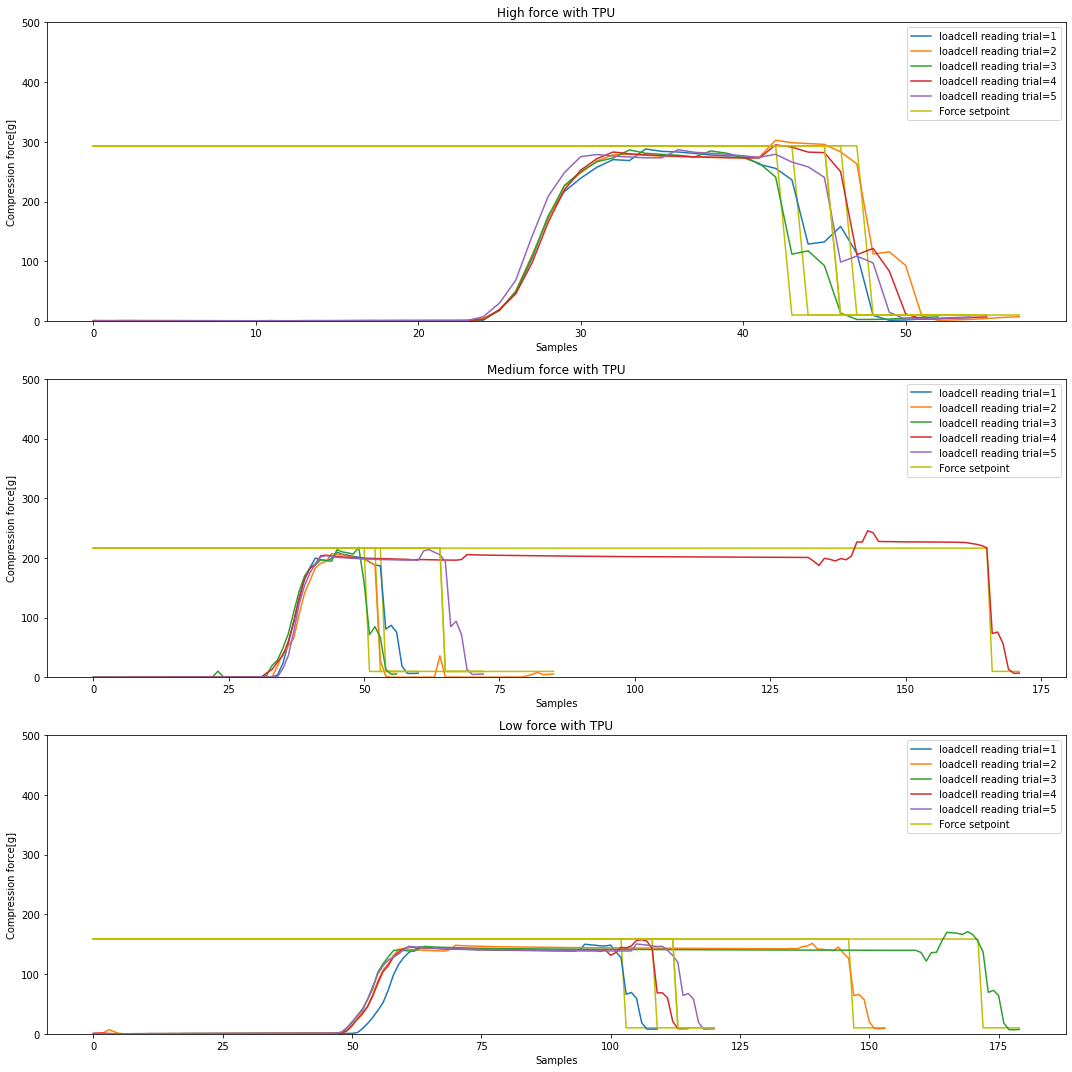

In [20]:
titles2 = [['High force with TPU'],
          ['Medium force with TPU'],
          ['Low force with TPU']]

Fd = [293.426523193016, 216.4170151196637, 158.64445305]
offstem_idx = [offstem_idx0, offstem_idx1, offstem_idx2]

fig, axs = plt.subplots(3)
fig.set_size_inches(15,15)
for i in range(3):
    sum = 0
    dif_0 = 0
    max_difs = 0
    for j, pull in enumerate(comp_setpoint[i]):
        Fd_vector = np.ones_like(pull)*Fd[i]
        Fd_vector[offstem_idx[i][j]::] = 10
        axs[i].plot(range(len(pull)), Fd_vector, 'y')#, label='Force setpoint')
        axs[i].plot(range(len(pull)), pull, label='loadcell reading trial='+str(j+1))
        axs[i].set_xlabel("Samples")
        axs[i].set_ylabel("Compression force[g]")
        axs[i].set_ylim([0, 500])
        axs[i].set_title(titles2[i][0])
    axs[i].plot(range(len(pull)), Fd_vector, 'y', label='Force setpoint')
    axs[i].legend(loc="upper right")
        # sum += np.max(pull)
        # for k in range(1, len(pull)):
        #     dif = pull[k-1]-pull[k]
        #     if dif > dif_0:
        #         dif_0 = dif
        # max_difs += dif_0
    # print('Mean max',sum/len(pull_setpoints[i]))
    # print('Mean max dif', max_difs/len(pull_setpoints[i]))
    # print('Max dif', dif_0)
    # print('\n\n')

Text(0.5, 1.0, 'Gripper pulling force')

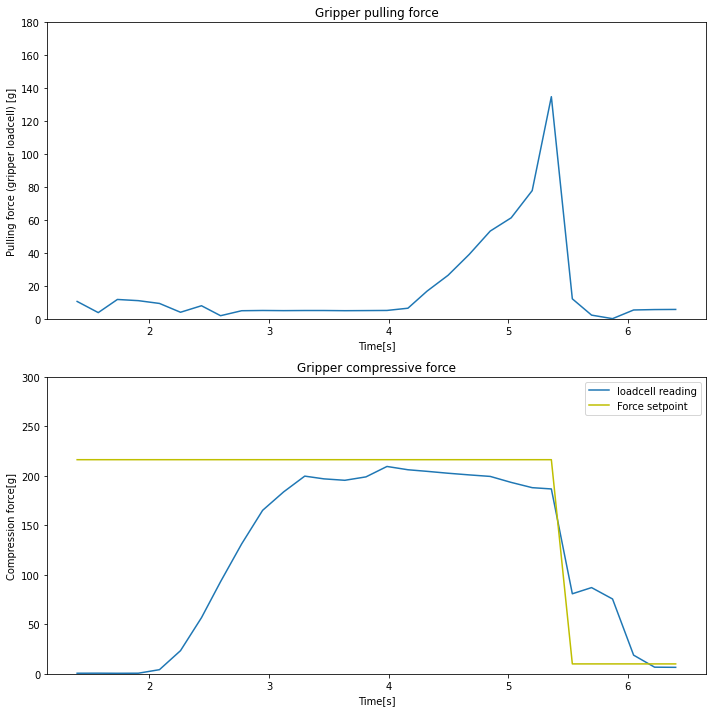

In [23]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches(10,10)
Fd_vector = np.ones_like(comp_setpoint[1][0])*Fd[1]
Fd_vector[offstem_idx[1][0]::] = 10
axs[1].plot(time_M_TPU[0][0:30], comp_setpoint[1][0][30:60], label="loadcell reading")
axs[1].set_xlabel("Time[s]")
axs[1].set_ylabel("Compression force[g]")
axs[1].set_ylim([0, 300])
axs[1].set_title('Gripper compressive force')
axs[1].plot(time_M_TPU[0][0:30], Fd_vector[30:60], 'y', label='Force setpoint')
axs[1].legend(loc="upper right")

axs[0].plot(time_M_TPU[0][0:30], pull_setpoints[1][0][30:60], label='loadcell reading')
axs[0].set_xlabel("Time[s]")
axs[0].set_ylabel("Pulling force (gripper loadcell) [g]")
axs[0].set_ylim([0, 180])
axs[0].set_title('Gripper pulling force')

In [22]:
max_val = []
# High
max_val.append(max(offstem_idx[0]))
new_comp_high = []
for i, pull in enumerate(comp_setpoint[0]):
    if i != offstem_idx[0].index(max_val[0]):
        extra = np.array([0]*(max_val[0]-offstem_idx[0][i]))
        new_comp_high.append(np.append(extra, pull))
    else:
        new_comp_high.append(np.array(pull))

# Medium
max_val.append(max(offstem_idx[1]))
new_comp_mid = []
for i, pull in enumerate(comp_setpoint[1]):
    if i != offstem_idx[1].index(max_val[1]):
        extra = np.array([0]*(max_val[1]-offstem_idx[1][i]))
        new_comp_mid.append(np.append(extra, pull))
    else:
        new_comp_mid.append(np.array(pull))

# Low
max_val.append(max(offstem_idx[2]))
new_comp_low = []
for i, pull in enumerate(comp_setpoint[2]):
    if i != offstem_idx[2].index(max_val[2]):
        extra = np.array([0]*(max_val[2]-offstem_idx[2][i]))
        new_comp_low.append(np.append(extra, pull))
    else:
        new_comp_low.append(np.array(pull))

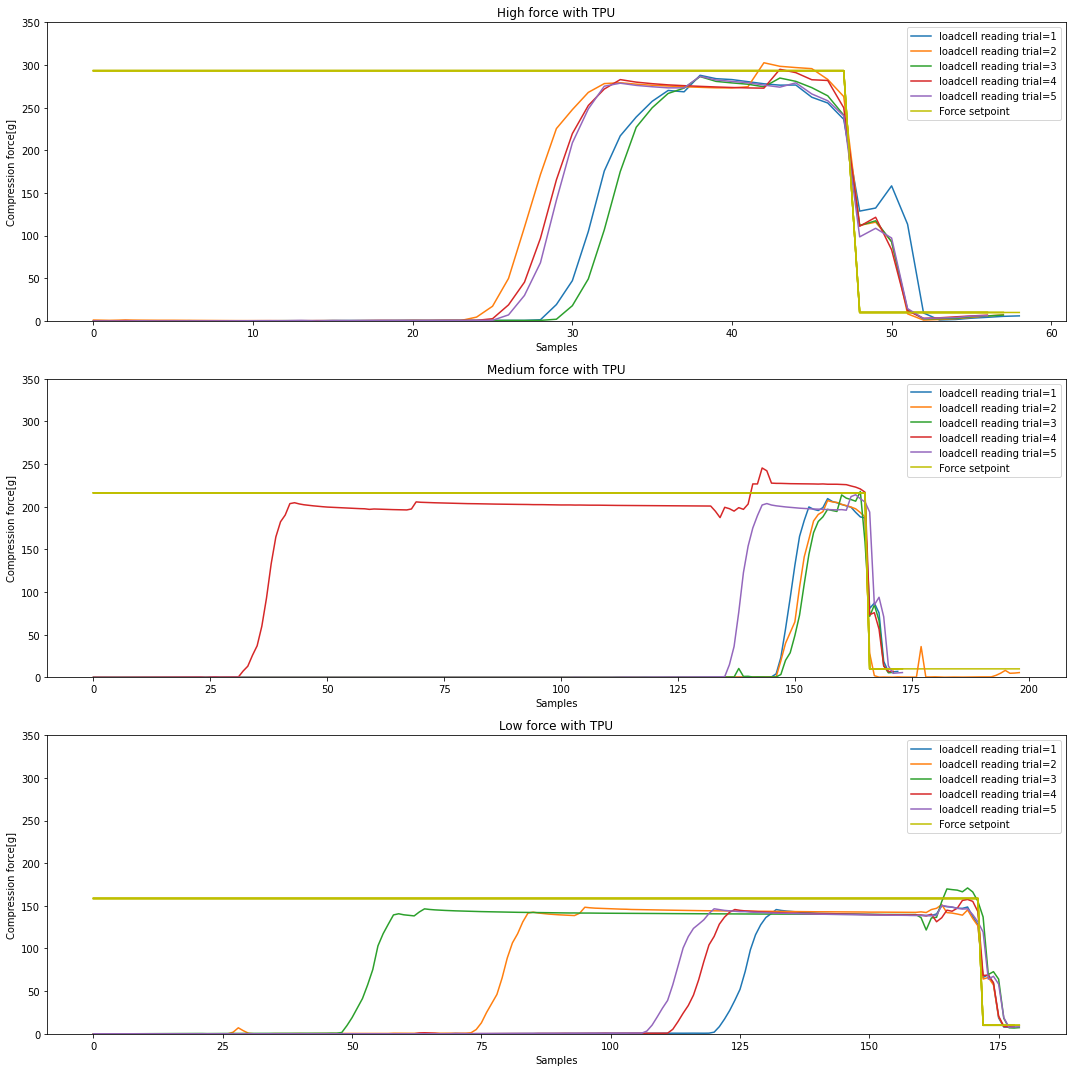

In [ ]:
titles2 = [['High force with TPU'],
          ['Medium force with TPU'],
          ['Low force with TPU']]

Fd = [293.426523193016, 216.4170151196637, 158.64445305]

new_comp = [new_comp_high, new_comp_mid, new_comp_low]

fig, axs = plt.subplots(3)
fig.set_size_inches(15,15)
for i in range(3):
    sum = 0
    dif_0 = 0
    max_difs = 0
    for j, pull in enumerate(new_comp[i]):
        Fd_vector = np.ones_like(pull)*Fd[i]
        Fd_vector[max_val[i]::] = 10
        axs[i].plot(range(len(pull)), Fd_vector, 'y')#, label='Force setpoint')
        axs[i].plot(range(len(pull)), pull, label='loadcell reading trial='+str(j+1))
        axs[i].set_xlabel("Samples")
        axs[i].set_ylabel("Compression force[g]")
        axs[i].set_ylim([0, 350])
        axs[i].set_title(titles2[i][0])
    axs[i].plot(range(len(pull)), Fd_vector, 'y', label='Force setpoint')
    axs[i].legend(loc="upper right")

## Raspberry twin comparison values

In [11]:
human_refM = [ 4.37850000e-03,  1.68550000e-03, -1.71292500e-02, -1.91565000e-02,
       -9.97350000e-03, -1.60260000e-02, -3.66265000e-02, -4.15585000e-02,
       -2.35215000e-02, -2.44950000e-03,  2.35467500e-02,  3.79987500e-02,
        3.16317500e-02,  3.97090000e-02,  6.64565000e-02,  8.16067500e-02,
        6.79160000e-02,  2.62400000e-02, -1.51945000e-02, -1.38632500e-02,
        1.34350000e-03,  1.81775000e-03,  1.46805000e-02,  8.49325000e-03,
       -2.87540000e-02, -3.13802500e-02, -1.71370000e-02, -1.87115000e-02,
       -8.96175000e-03, -1.51437500e-02, -3.20282500e-02, -3.83185000e-02,
       -3.10180000e-02, -7.61600000e-03,  8.86750000e-03,  2.56820000e-02,
        3.75460000e-02,  2.88355000e-02,  4.28410000e-02,  6.56805000e-02,
        5.81917500e-02,  4.95755000e-02,  5.07695000e-02,  5.25055000e-02,
        5.25480000e-02,  3.97190000e-02,  2.43157500e-02,  2.15570000e-02,
        2.22600000e-03, -1.14987500e-02, -1.35690000e-02, -2.04975000e-02,
       -3.52805000e-02, -3.10382500e-02, -1.13092500e-02, -1.04300000e-02,
       -8.15250000e-03, -2.03050000e-03, -3.10725000e-03, -7.80750000e-04,
        1.29020000e-02,  2.09547500e-02,  1.15622500e-02, -6.60500000e-03,
       -1.02775000e-02,  5.15675000e-03,  1.41405000e-02,  3.92200000e-03,
        9.25250000e-04,  1.11930000e-02,  1.38115000e-02, -6.05200000e-03,
       -2.67427500e-02, -1.91530000e-02,  2.13110000e-02,  4.27812500e-02,
        1.85015000e-02, -1.69280000e-02, -3.39350000e-02, -4.44940000e-02,
       -5.75847500e-02, -6.07275000e-02, -4.38220000e-02, -2.81107500e-02,
       -9.08325000e-03,  1.46977500e-02,  1.93702500e-02,  2.20140000e-02,
        2.38455000e-02,  2.21280000e-02,  2.08377500e-02,  2.23355000e-02,
        1.01965000e-02,  6.88075000e-03,  1.54630000e-02,  1.31335000e-02,
        7.75325000e-03,  1.78135000e-02,  1.99680000e-02, -1.20500000e-04,
       -2.31610000e-02, -2.86980000e-02, -1.03890000e-02, -1.15822500e-02,
       -2.92140000e-02, -3.37510000e-02, -3.01290000e-02, -4.43720000e-02,
       -4.37967500e-02, -1.18895000e-02,  1.62370000e-02,  9.62775000e-03,
       -3.17195000e-02, -5.98162500e-02, -4.78437500e-02, -3.07102500e-02,
       -3.22595000e-02, -2.57772500e-02, -7.84100000e-03,  7.82750000e-04,
        5.27500000e-03, -1.02325000e-03, -1.47830000e-02, -2.47542500e-02,
       -3.89010000e-02, -5.62175000e-02, -4.37180000e-02, -1.50122500e-02,
       -1.73962500e-02, -2.19432500e-02, -2.82762500e-02, -4.43385000e-02,
       -5.02167500e-02, -3.87620000e-02, -1.82750000e-02, -3.69300000e-03,
       -2.41130000e-02, -4.26542500e-02, -1.23265000e-02,  1.55657500e-02,
       -4.00650000e-03, -8.06150000e-03,  1.37947500e-02,  1.77150000e-02,
        1.35980000e-02,  5.95325000e-03,  1.63007500e-02,  5.16865000e-02,
        8.68835000e-02,  9.53942500e-02,  8.56842500e-02,  1.00911500e-01,
        1.34658750e-01,  1.55590000e-01,  1.69227500e-01,  1.74795750e-01,
        1.87902750e-01,  2.60626500e-01,  4.22926750e-01,  5.78439750e-01,
        6.87788750e-01,  8.01125750e-01,  9.08415000e-01,  9.90187500e-01,
        1.11722300e+00,  1.32205400e+00,  1.47795075e+00,  1.54424450e+00,
        1.62792825e+00,  1.70305175e+00,  1.70589700e+00,  1.75517750e+00,
        1.92913400e+00,  2.17022050e+00,  2.47925575e+00,  2.48872625e+00,
        1.63926275e+00,  3.36757500e-01, -4.25070250e-01, -8.39319000e-01,
       -1.23609850e+00, -1.56708325e+00, -1.89151450e+00, -2.28234575e+00,
       -2.53375275e+00, -2.54210475e+00, -2.43482875e+00, -2.23098950e+00,
       -2.04300900e+00, -1.97305950e+00, -1.98168450e+00, -2.02589975e+00,
       -2.07099775e+00, -2.04859675e+00, -1.96986775e+00, -1.93579825e+00,
       -1.96323675e+00, -2.00289125e+00, -2.01609125e+00, -1.98516700e+00,
       -1.94989225e+00, -1.93664825e+00, -1.92937275e+00, -1.92184000e+00,
       -1.90952300e+00, -1.89180075e+00, -1.87556700e+00, -1.86692225e+00,
       -1.87712700e+00, -1.87933175e+00, -1.86411550e+00, -1.85411775e+00,
       -1.84055425e+00, -1.80435650e+00, -1.76739300e+00, -1.74898850e+00,
       -1.73790400e+00, -1.73564825e+00, -1.75065325e+00, -1.75265650e+00,
       -1.73059175e+00, -1.70997700e+00, -1.70469525e+00, -1.70223800e+00,
       -1.69292550e+00, -1.68620850e+00, -1.68104850e+00, -1.68228400e+00,
       -1.69213675e+00, -1.70132425e+00, -1.69942400e+00, -1.68249925e+00,
       -1.67625250e+00, -1.69583575e+00, -1.71096575e+00, -1.70885175e+00,
       -1.71589450e+00, -1.71982875e+00, -1.71389025e+00, -1.71647250e+00,
       -1.71668325e+00, -1.71703625e+00, -1.71589800e+00, -1.71176550e+00,
       -1.70985550e+00, -1.70593450e+00, -1.70717325e+00, -1.71589450e+00,
       -1.72150725e+00, -1.71891525e+00, -1.70223825e+00, -1.67870225e+00,
       -1.67457075e+00, -1.69449700e+00, -1.72273550e+00, -1.72888225e+00,
       -1.71288025e+00, -1.69987850e+00, -1.69259675e+00, -1.68968325e+00,
       -1.69807550e+00, -1.70389550e+00, -1.68798350e+00, -1.66010125e+00,
       -1.64911025e+00, -1.66278675e+00, -1.68394825e+00, -1.69907500e+00,
       -1.69525500e+00, -1.68048775e+00, -1.66623375e+00, -1.65248400e+00,
       -1.65077475e+00, -1.65908375e+00, -1.66265475e+00, -1.67252850e+00,
       -1.67946050e+00, -1.68653725e+00, -1.69335825e+00, -1.68541575e+00,
       -1.67622825e+00, -1.67622475e+00, -1.68530150e+00, -1.69190775e+00,
       -1.67946700e+00, -1.66738300e+00, -1.67352850e+00, -1.68193750e+00,
       -1.67924225e+00, -1.67454275e+00, -1.67206475e+00, -1.66715025e+00,
       -1.66198375e+00, -1.66120500e+00, -1.66187625e+00, -1.66590800e+00,
       -1.66725775e+00, -1.66938600e+00, -1.67868525e+00, -1.68529125e+00]
human_refM

[0.0043785,
 0.0016855,
 -0.01712925,
 -0.0191565,
 -0.0099735,
 -0.016026,
 -0.0366265,
 -0.0415585,
 -0.0235215,
 -0.0024495,
 0.02354675,
 0.03799875,
 0.03163175,
 0.039709,
 0.0664565,
 0.08160675,
 0.067916,
 0.02624,
 -0.0151945,
 -0.01386325,
 0.0013435,
 0.00181775,
 0.0146805,
 0.00849325,
 -0.028754,
 -0.03138025,
 -0.017137,
 -0.0187115,
 -0.00896175,
 -0.01514375,
 -0.03202825,
 -0.0383185,
 -0.031018,
 -0.007616,
 0.0088675,
 0.025682,
 0.037546,
 0.0288355,
 0.042841,
 0.0656805,
 0.05819175,
 0.0495755,
 0.0507695,
 0.0525055,
 0.052548,
 0.039719,
 0.02431575,
 0.021557,
 0.002226,
 -0.01149875,
 -0.013569,
 -0.0204975,
 -0.0352805,
 -0.03103825,
 -0.01130925,
 -0.01043,
 -0.0081525,
 -0.0020305,
 -0.00310725,
 -0.00078075,
 0.012902,
 0.02095475,
 0.01156225,
 -0.006605,
 -0.0102775,
 0.00515675,
 0.0141405,
 0.003922,
 0.00092525,
 0.011193,
 0.0138115,
 -0.006052,
 -0.02674275,
 -0.019153,
 0.021311,
 0.04278125,
 0.0185015,
 -0.016928,
 -0.033935,
 -0.044494,
 -0.0

In [12]:
rasp_robot = [-0.03535833893158724, -0.07857160429523447, -0.0785530930349978, 0.014677510142405481, 0.08414084389676191, 0.05457173878812682, -0.06774181526293432, -0.03415952164937153, 0.0007518810778037732, -0.04895737055039717, -0.0014360636342871658, 0.05500154121534706, 0.03664674904075582, 0.019646953648702947, -0.009506029398949067, -0.03283026447161319, 0.014221090950627513, 0.009264883012519931, -0.05435631974489752, -0.049440259052744295, 0.014593497230634966, -0.06602393360105907, -0.08936496852288656, -0.08400616779033498, -0.03735814730680431, -0.07992354058706042, -0.11754893231045571, -0.14080283422379125, 0.029501832005848883, 0.09009168176669391, 0.1515988150136991, 0.6383759448491446, 0.9496445595225396, 1.374785250658988, 2.04680433997612, 2.4464653707841535, 3.01852343169503, 3.0899287130582707, 3.0904803013420405, 3.09048030621193, 3.090037270043581, 3.0662833824328573, 3.066283381825315, 3.090023887020834, 3.0850812095615083, 3.050586226843734, 3.0850813582335377, 3.090467071863941, 3.090480752228814, 3.0913802088048215, 3.1443004624851483, 3.18956702296407, 3.1765961684460535, 3.1225126082301813, 3.537941031047353, 3.8639554580134927, -0.9714036716229657, -6.530085218911836, -3.8508830132776666, -4.440911225317336]
time = [0.61726,
 0.648234,
 0.679934,
 0.711178,
 0.742096,
 0.788331,
 0.819884,
 0.850773,
 0.882725,
 0.912837,
 0.94368,
 0.974048,
 1.005372,
 1.037129,
 1.068284,
 1.099393,
 1.13097,
 1.162009,
 1.192436,
 1.223576,
 1.270297,
 1.302162,
 1.347637,
 1.378496,
 1.409595,
 1.441026,
 1.471573,
 1.502156,
 1.534193,
 1.565409,
 1.59673,
 1.627199,
 1.658054,
 1.689128,
 1.721004,
 1.750924,
 1.782829,
 1.813206,
 1.845175,
 1.876108,
 1.906534,
 1.938699,
 1.970056,
 2.001325,
 2.033831,
 2.063937,
 2.094404,
 2.124553,
 2.155405,
 2.18641,
 2.217467,
 2.248903,
 2.280978,
 2.326939,
 2.358891,
 2.389776,
 2.41987,
 2.450944,
 2.482142,
 2.512751,
 2.544392,
 2.575692,
 2.606773,
 2.63783,
 2.669424,
 2.70014,
 2.731184,
 2.762515,
 2.808889,
 2.839765,
 2.870482,
 2.901341,
 2.93311,
 2.964509,
 2.996081,
 3.025953,
 3.057163,
 3.088493,
 3.119819,
 3.151316,
 3.182469,
 3.212519,
 3.243195,
 3.274527,
 3.305856,
 3.336445,
 3.367041,
 3.398309,
 3.430289,
 3.461252,
 3.508345,
 3.539161,
 3.569499,
 3.600762,
 3.631274,
 3.663095,
 3.693535,
 3.724318,
 3.756225,
 3.787298,
 3.818091,
 3.84772,
 3.895251,
 3.926491,
 3.958489,
 3.989888,
 4.020245,
 4.052215,
 4.099136,
 4.129734,
 4.160281,
 4.190703,
 4.221526,
 4.252913,
 4.284737,
 4.315562,
 4.362803,
 4.393821,
 4.425022,
 4.456667,
 4.488475,
 4.518998,
 4.549651,
 4.580569,
 4.611337,
 4.642094,
 4.672802,
 4.70363,
 4.733741,
 4.764649,
 4.795909,
 4.827076,
 4.85853,
 4.889568,
 4.920553,
 4.951451,
 4.98304,
 5.014369,
 5.045039,
 5.075991,
 5.107494,
 5.138865,
 5.170458,
 5.202138,
 5.233148,
 5.264423,
 5.295555,
 5.327472,
 5.358765,
 5.389297,
 5.421281,
 5.451822,
 5.483492,
 5.514807,
 5.545766,
 5.577801,
 5.608243,
 5.639222,
 5.669588,
 5.700584,
 5.731174,
 5.762724,
 5.793641,
 5.824319,
 5.856416,
 5.887165,
 5.918846,
 5.950014,
 5.980092,
 6.011306,
 6.042395,
 6.073296,
 6.104526,
 6.135597,
 6.166533,
 6.19719,
 6.228045,
 6.259429,
 6.290372,
 6.320924,
 6.351707,
 6.382762,
 6.414181,
 6.444846,
 6.47597,
 6.507552,
 6.538564,
 6.569899,
 6.600916,
 6.632088,
 6.663296,
 6.694032,
 6.725651,
 6.758091,
 6.789811,
 6.820761,
 6.851677,
 6.883588,
 6.913479,
 6.945394,
 6.975314,
 7.005265,
 7.03715,
 7.06707,
 7.099023,
 7.130932,
 7.161843,
 7.192736,
 7.222412,
 7.253916,
 7.285568,
 7.315616,
 7.346327,
 7.378041,
 7.408592,
 7.439259,
 7.470731,
 7.501076,
 7.532528,
 7.562937,
 7.594794,
 7.624918,
 7.656197,
 7.687701,
 7.718786,
 7.750228,
 7.781813,
 7.813861,
 7.844887,
 7.876413,
 7.907225,
 7.937953,
 7.969607,
 8.000376,
 8.031195,
 8.06193,
 8.093288,
 8.123983,
 8.1555,
 8.187414,
 8.218333,
 8.249249,
 8.281157,
 8.312073,
 8.342992,
 8.37492,
 8.404827,
 8.436734,
 8.466668,
 8.498582,
 8.530492,
 8.560411,
 8.592326,
 8.624105,
 8.654648,
 8.686025,
 8.715934,
 8.746488,
 8.778759,
 8.810513,
 8.840464,
 8.872182,
 8.903859,
 8.934563,
 8.9661,
 8.996581,
 9.027415,
 9.057557,
 9.088571,
 9.119294,
 9.150487,
 9.181261,
 9.213175,
 9.244128,
 9.274536,
 9.305985,
 9.337944,
 9.368814,
 9.400387,
 9.430993,
 9.461705,
 9.493245,
 9.524908,
 9.556804,
 9.587291,
 9.618721,
 9.649845,
 9.680823,
 9.712793,
 9.743137,
 9.774431,
 9.805788,
 9.837142,
 9.868421,
 9.899834,
 9.930775,
 9.961422,
 9.993313,
 10.02467,
 10.05529]

In [70]:
rasp_robot2 =[ 0.01618068063658029, -0.06756246723864479, -0.005796690534452864, 0.03054003848183129, -0.01959886568465663, 0.008155706396109963, 0.08211912624142315, 0.1063292837662857, 0.06150576250263384, 0.02116849768663087, 0.031426556227529545, 0.002260039666225566, -0.0542038833928018, -0.06363281912183538, 0.00047498326978256955, 0.1375999167039481, 0.008989138072820424, -0.046521500180688236, 0.1188853980136173, 0.3090440529579155, 0.7163840859518587, 1.9902291916077957, 3.6656212531753454, 5.048244304095647, 5.307843751123869, 5.310772313810844, 5.309858888043323, 5.247014006932204, 4.882062053120194, 4.357646788817078, 4.309988971784833, 4.242510484841091, 2.8705564231613607, -0.9274138311398019, -1.6808805872376524, -1.6887401739719508, -1.647434495182324, -1.4421201573973121, -1.1668695480663018, -1.036847294428071, -1.1174769270849083, -1.0421782829444055, -1.1761557472900677, -1.0269647567799893, -1.1725586826672725, -1.1949968466155951, -0.9840230907323075, -1.1654714140971691, -1.194570422078641, -1.0305873974664337, -1.0085650761345732, -1.0833000757984337, -0.9843141718226889, -0.9834115945449184, -0.9425646663943326, -1.0254932097249139, -0.9336079214385791, -0.9438759467816453, -0.8839117326306223, -0.9166617666544425, -1.0304927989811858, -1.050189486790373, -0.9717835381028408, -0.8565841277908248, -0.9641295445117066, -1.043018244851737, -0.9032092073459808, -0.9045343173808078, -0.859700534407466, -0.9237620962134088, -0.9067664479653104, -1.0515450764298748, -1.0102955560923874, -0.9408191372623378, -0.9139070716277047, -0.9031121470873131, -0.9375370945972463, -0.8048984188275199, -0.8165651518711456, -0.8147263794213586]


In [71]:
len(human_refM), len(rasp_robot2)
# time.index(6.507552)
# new_time = time[155-int(94/2):155+int(94/2)]
# len(new_time)

(300, 80)

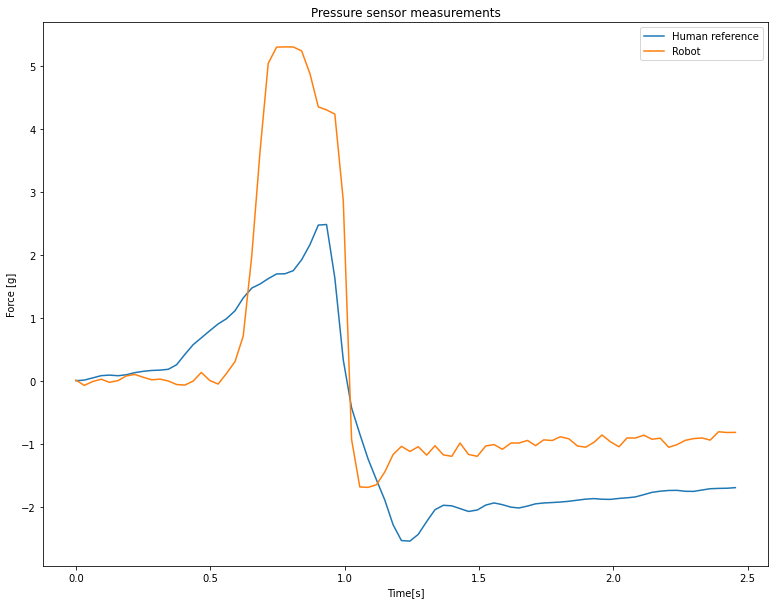

In [73]:
new_time = np.array(time[185-int(80/2):185+int(80/2)])-time[185-int(80/2)]
fig, axs = plt.subplots(1)
fig.set_size_inches(13,10)
axs.plot(new_time, human_refM[185-int(80/2):185+int(80/2)], label="Human reference")
axs.plot(new_time, rasp_robot2, label="Robot")
axs.set_xlabel("Time[s]")
axs.set_ylabel("Force [g]")
axs.set_title('Pressure sensor measurements')
axs.legend(loc="upper right")
